# Dataset 1 Analysis
## Rose_Data

In [1127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn import metrics
# !pip install pmdarima


In [1128]:
# Load dataset
rose_data = pd.read_csv('rose.csv', parse_dates=['YearMonth'], index_col='YearMonth')

# Rename columns for convenience
rose_data.columns = ['Rose']

print(rose_data.head())


             Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0


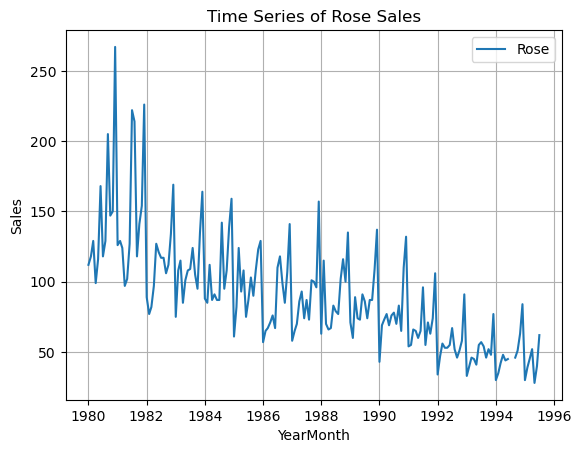

In [1129]:
# Plot Rose time series

plt.plot(rose_data, label='Rose')
plt.title('Time Series of Rose Sales')
plt.xlabel('YearMonth')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

In [1130]:
rose_data.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

In [1131]:
# Check for missing values
rose_data.isnull().sum()

Rose    2
dtype: int64

In [1132]:
rose_data = rose_data.interpolate(method='linear')  # Interpolation

In [1133]:
rose_data.isnull().sum()

Rose    0
dtype: int64

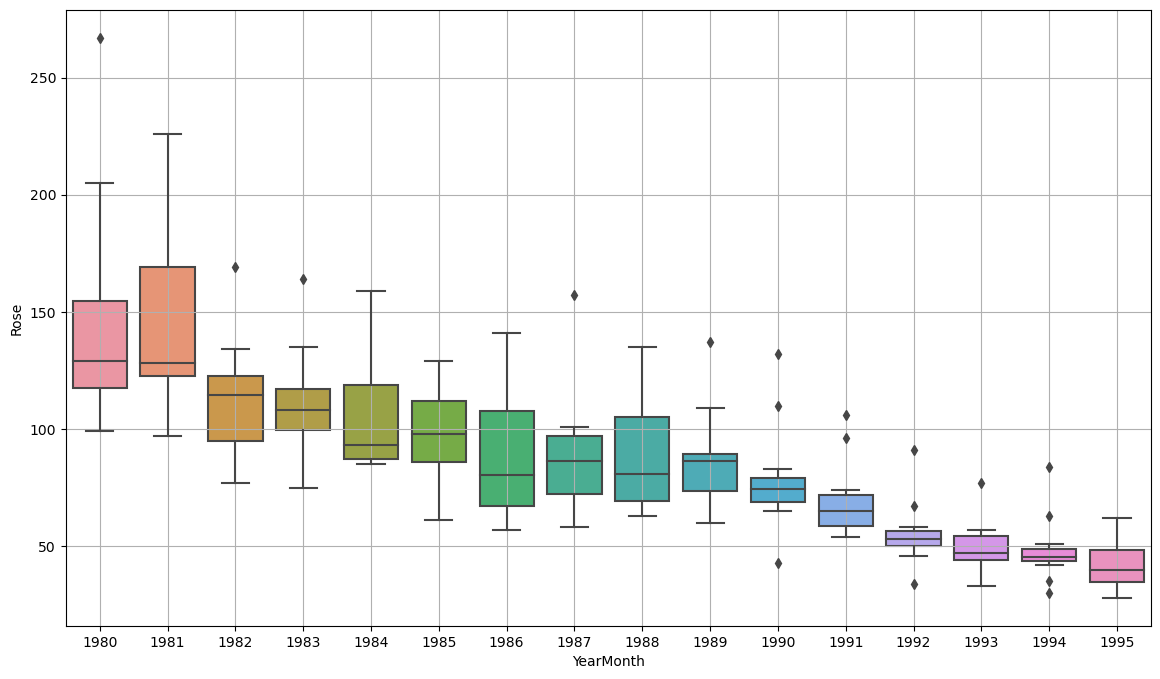

In [1134]:
plt.figure(figsize=(14, 8))
sns.boxplot(x = rose_data.index.year,y = rose_data['Rose'])
plt.grid();

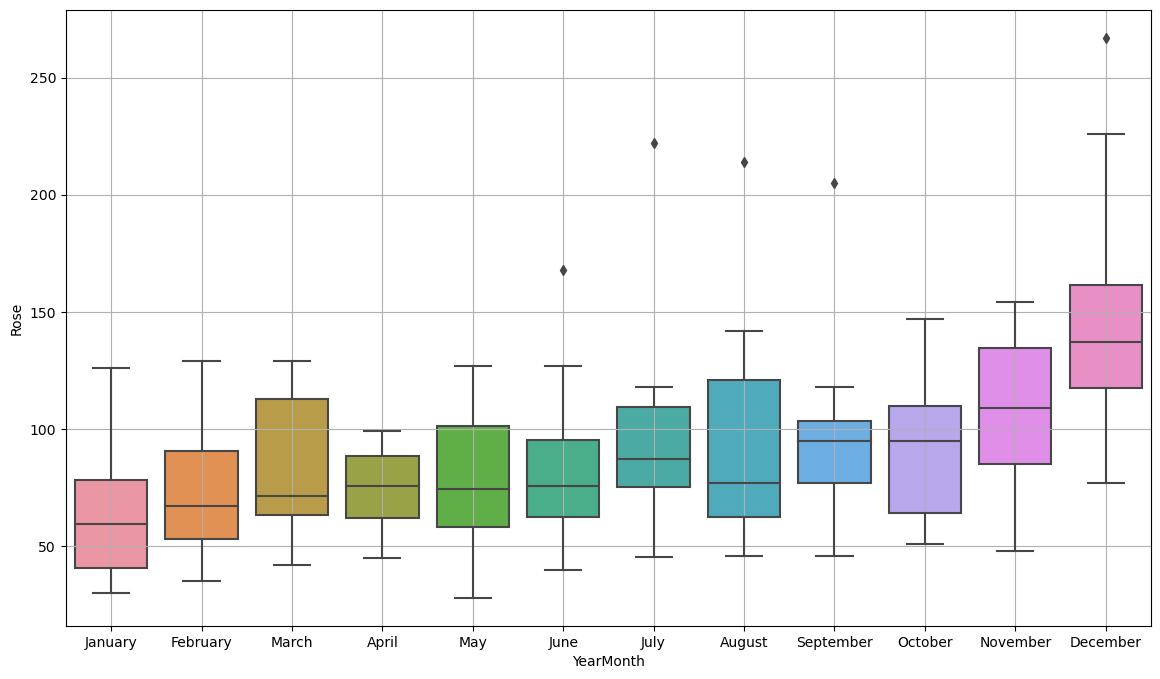

In [1135]:
plt.figure(figsize=(14, 8))
sns.boxplot(x = rose_data.index.month_name(),y = rose_data['Rose'])
plt.grid();

## Decomposition

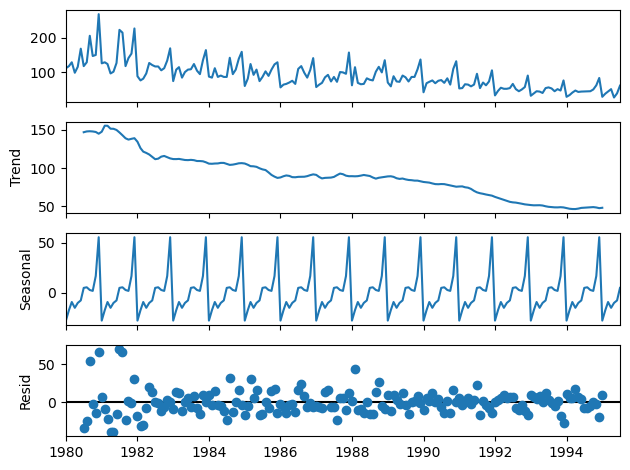

In [1137]:
from    statsmodels.tsa.seasonal import   seasonal_decompose
# Decompose Rose
decompose_rose = seasonal_decompose(rose_data, model='additive')
decompose_rose.plot()
plt.show()



In [1138]:
trend = decompose_rose.trend
seasonality = decompose_rose.seasonal
residual = decompose_rose.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
1980-11-01    16.846908
1980-12-01    55.713575
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
1980-11-01   -14.263575
1980-12-01    66.16142

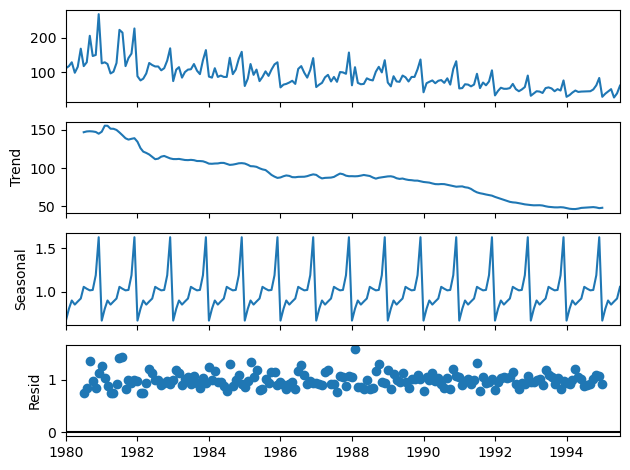

In [1139]:
# Decompose Rose
decompose_rose = seasonal_decompose(rose_data, model='multiplicative')
decompose_rose.plot()
plt.show()


In [1140]:
trend = decompose_rose.trend
seasonality = decompose_rose.seasonal
residual = decompose_rose.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670111
1980-02-01    0.806163
1980-03-01    0.901164
1980-04-01    0.854024
1980-05-01    0.889415
1980-06-01    0.923985
1980-07-01    1.058038
1980-08-01    1.035881
1980-09-01    1.017648
1980-10-01    1.022573
1980-11-01    1.192349
1980-12-01    1.628646
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758258
1980-08-01    0.840720
1980-09-01    1.357674
1980-10-01    0.970771
1980-11-01    0.853378
1980-12-01    1.129646
Name: resid, dtype: fl

### Additive Decomposition:
Trend: Shows a steady pattern, indicating a general underlying movement in the data. For example, values peak slightly around September.
Seasonality: Seasonal values are consistent in magnitude across months, with higher values in December (+55.71) and lower values in January (-27.91). This reflects fixed seasonal effects.
Residuals: Capture random noise, with significant deviations in months like December (+66.16) and July (-33.98).

### Multiplicative Decomposition:
Trend: Similar to the additive trend, showing stable movement over time.
Seasonality: Seasonal effects are proportional, with multipliers below 1 in January (0.67) and above 1 in December (1.63). This indicates the impact of seasonality varies depending on the trend level.
Residuals: Represent proportional random variations, such as 0.76 in July and 1.13 in December.

### Key Insight:
For the Rose dataset, multiplicative decomposition is more suitable because the seasonal effects are proportional to the trend rather than constant in magnitude.

## Train-test split

In [1143]:
train    =   rose_data[0:int(len(rose_data)*0.7)] 
test     =   rose_data[int(len(rose_data)*0.7):]

In [1144]:
print(train.shape)
print(test.shape)

(130, 1)
(57, 1)


In [1145]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
              Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0 

Last few rows of Training Data 
             Rose
YearMonth       
1990-06-01  76.0
1990-07-01  78.0
1990-08-01  70.0
1990-09-01  83.0
1990-10-01  65.0 

First few rows of Test Data 
              Rose
YearMonth        
1990-11-01  110.0
1990-12-01  132.0
1991-01-01   54.0
1991-02-01   55.0
1991-03-01   66.0 

Last few rows of Test Data 
             Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0 



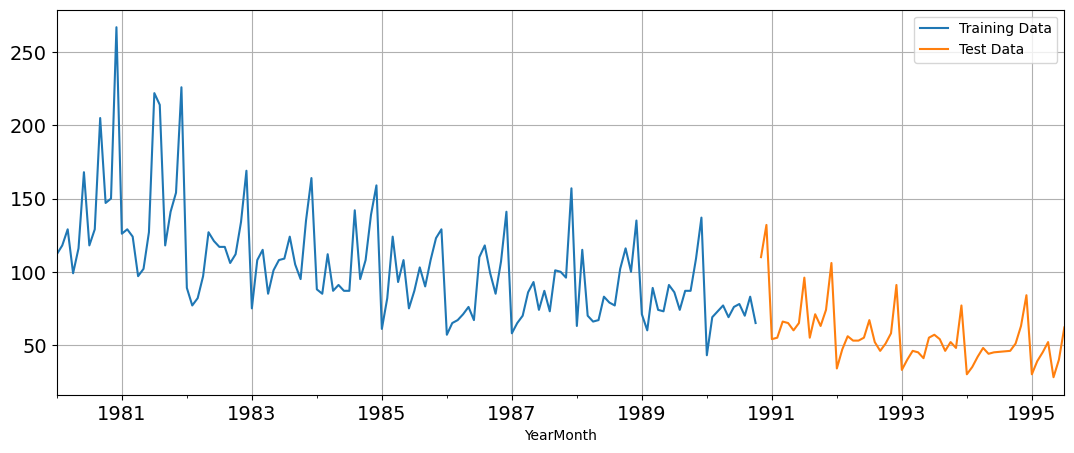

In [1146]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Model Building - Original Data

## **Linear Regression Model**

In [1149]:

# Generate time index for linear regression
train_time = [i+1 for i in range(len(train))]
test_time = [i+131 for i in range(len(test))]  # Start after the last index of train data

print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test Time instance 
 [131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [1150]:
# Prepare data for Linear Regression
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [1151]:

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
             Rose  time
YearMonth             
1990-06-01  76.0   126
1990-07-01  78.0   127
1990-08-01  70.0   128
1990-09-01  83.0   129
1990-10-01  65.0   130 

First few rows of Test Data 
              Rose  time
YearMonth              
1990-11-01  110.0   131
1990-12-01  132.0   132
1991-01-01   54.0   133
1991-02-01   55.0   134
1991-03-01   66.0   135 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



In [1152]:
# Fit Linear Regression model
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']], LinearRegression_train['Rose'])


LinearRegression()

In [1153]:
# Predict on Test Data
lr_predictions = lr.predict(LinearRegression_test[['time']])


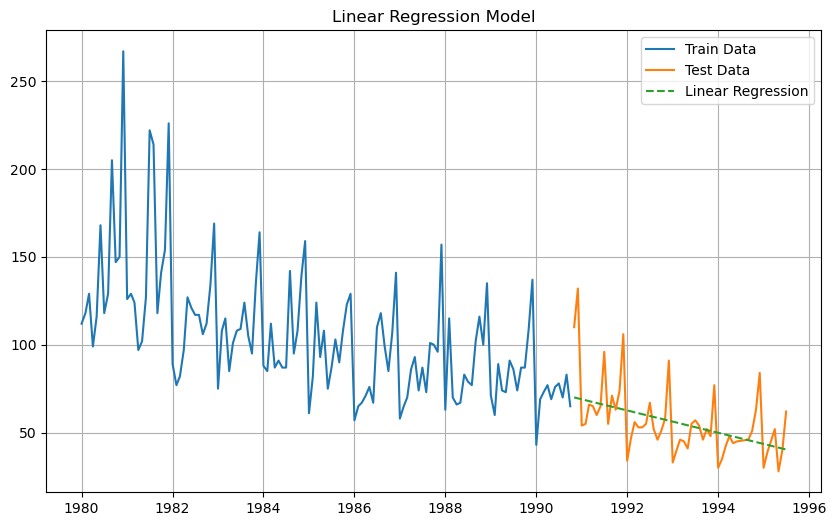

In [1154]:
# Plot Linear Regression Model
plt.figure(figsize=(10,6))
plt.plot(train['Rose'], label='Train Data')
plt.plot(test.index, test['Rose'], label='Test Data')
plt.plot(test.index, lr_predictions, label='Linear Regression', linestyle='--')
plt.legend(loc='best')
plt.title('Linear Regression Model')
plt.grid(True)
plt.show()

In [1155]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],lr_predictions,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 17.36


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [1156]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf


Test RMSE
RegressionOnTime  17.355796

# **Simple Average Model**

In [1158]:
simple_avg = np.mean(train['Rose'])
simple_avg_predictions = np.full(len(test), simple_avg)

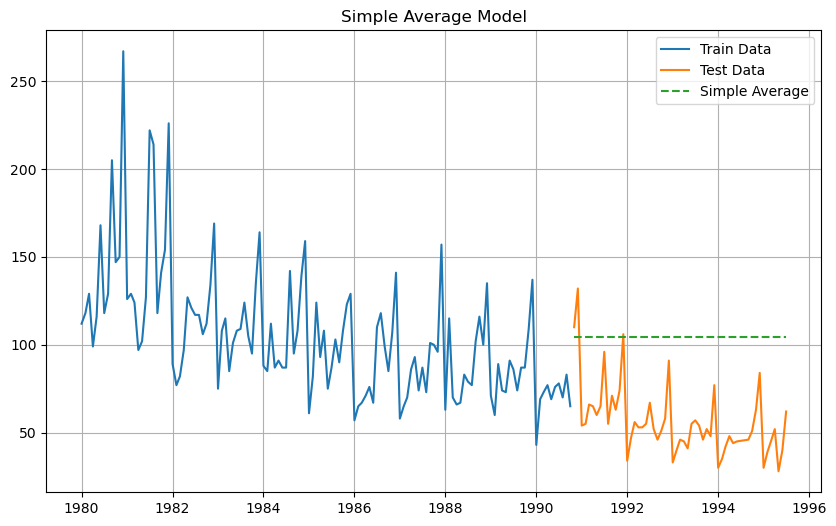

In [1159]:

# Plot Simple Average Model
plt.figure(figsize=(10,6))
plt.plot(train['Rose'], label='Train Data')
plt.plot(test.index, test['Rose'], label='Test Data')
plt.plot(test.index, simple_avg_predictions, label='Simple Average', linestyle='--')
plt.legend(loc='best')
plt.title('Simple Average Model')
plt.grid(True)
plt.show()

In [1160]:
# Calculate RMSE for the Simple Average model on Test Data
rmse_simple_average = metrics.mean_squared_error(test['Rose'], simple_avg_predictions, squared=False)

# Print the RMSE result
print("For Simple Average forecast on the Test Data, RMSE is %.2f" % (rmse_simple_average))

For Simple Average forecast on the Test Data, RMSE is 52.41


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [1161]:
# Create DataFrame to store RMSE results for both models
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test, rmse_simple_average]}, index=['RegressionOnTime', 'SimpleAverage'])

# Display the results
print(resultsDf)

                  Test RMSE
RegressionOnTime  17.355796
SimpleAverage     52.412093


#  Moving Average(MA)

In [1163]:
# Create the Moving Average Model
MovingAverage = rose_data.copy()
MovingAverage.head()


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [1164]:
# Calculate Moving Averages for different window sizes
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

# Display first few rows
print(MovingAverage.head())

             Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN


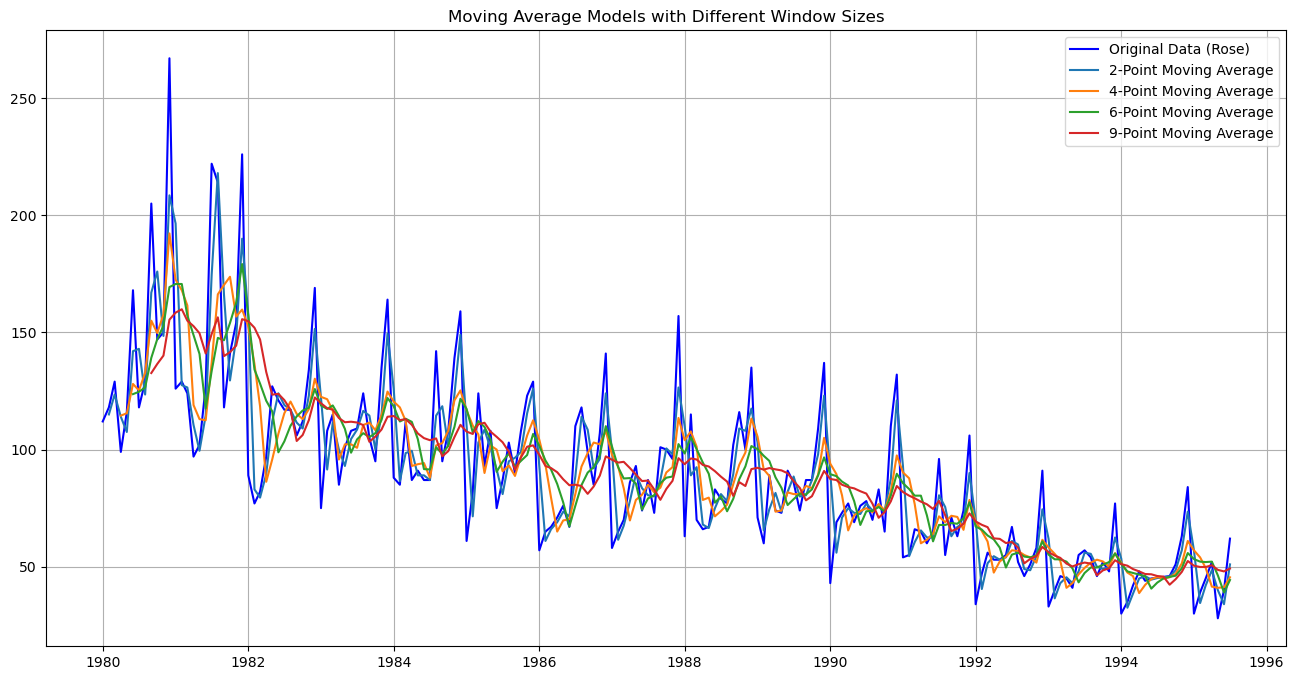

In [1165]:

# Plotting Moving Averages for entire data
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Original Data (Rose)', color='blue')
plt.plot(MovingAverage['Trailing_2'], label='2-Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4-Point Moving Average')
plt.plot(MovingAverage['Trailing_6'], label='6-Point Moving Average')
plt.plot(MovingAverage['Trailing_9'], label='9-Point Moving Average')

plt.legend(loc='best')
plt.title('Moving Average Models with Different Window Sizes')
plt.grid(True)
plt.show()

In [1166]:
# Create Train and Test Sets (70% Train, 30% Test)
train_size = int(len(MovingAverage) * 0.7)
train = MovingAverage[:train_size]
test = MovingAverage[train_size:]

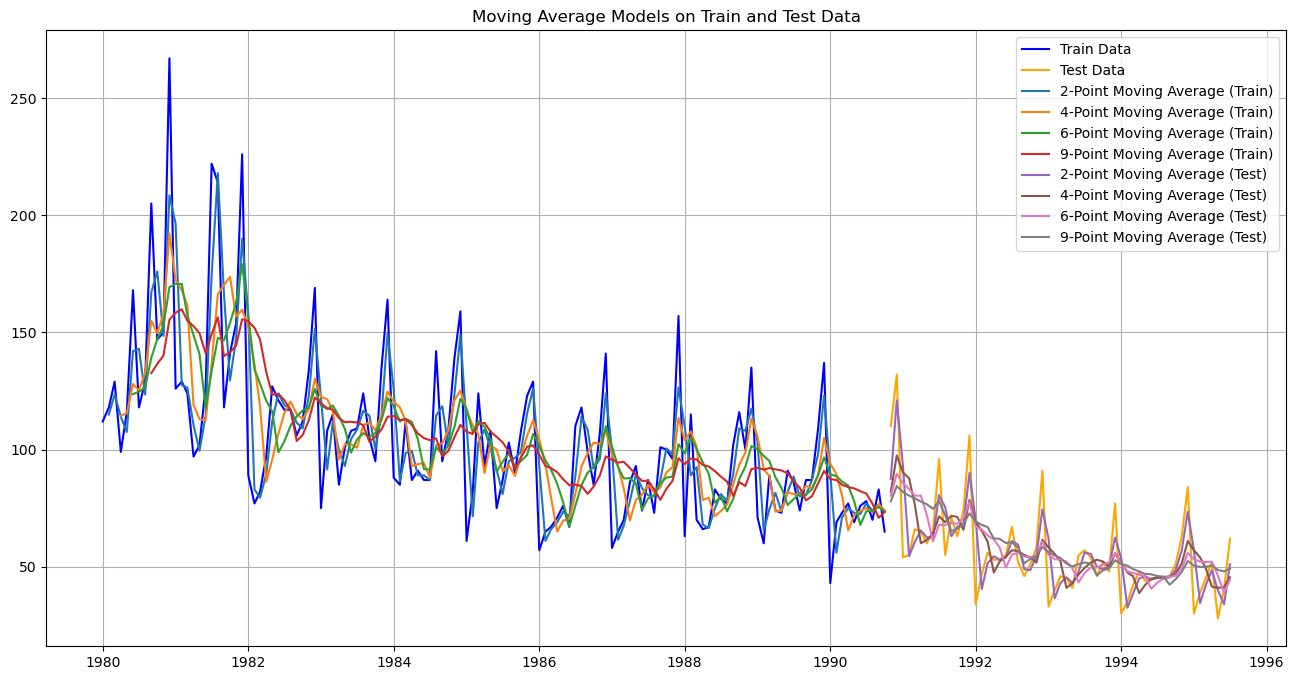

In [1167]:
# Plot Moving Averages on Train and Test Data
plt.figure(figsize=(16,8))
plt.plot(train['Rose'], label='Train Data', color='blue')
plt.plot(test['Rose'], label='Test Data', color='orange')

# Plot different moving averages on Train Data
plt.plot(train['Trailing_2'], label='2-Point Moving Average (Train)')
plt.plot(train['Trailing_4'], label='4-Point Moving Average (Train)')
plt.plot(train['Trailing_6'], label='6-Point Moving Average (Train)')
plt.plot(train['Trailing_9'], label='9-Point Moving Average (Train)')

# Plot different moving averages on Test Data
plt.plot(test['Trailing_2'], label='2-Point Moving Average (Test)')
plt.plot(test['Trailing_4'], label='4-Point Moving Average (Test)')
plt.plot(test['Trailing_6'], label='6-Point Moving Average (Test)')
plt.plot(test['Trailing_9'], label='9-Point Moving Average (Test)')

plt.legend(loc='best')
plt.title('Moving Average Models on Train and Test Data')
plt.grid(True)
plt.show()


In [1168]:
# Calculate RMSE for 2, 4, 6, and 9-point Trailing Moving Averages on Test Data
from sklearn.metrics import mean_squared_error

## Test Data - RMSE --> 2-point Trailing MA
rmse_model4_test_2 = mean_squared_error(test['Rose'], test['Trailing_2'], squared=False)
print("For 2-point Moving Average Model forecast on the Test Data, RMSE is %3.3f" % rmse_model4_test_2)

## Test Data - RMSE --> 4-point Trailing MA
rmse_model4_test_4 = mean_squared_error(test['Rose'], test['Trailing_4'], squared=False)
print("For 4-point Moving Average Model forecast on the Test Data, RMSE is %3.3f" % rmse_model4_test_4)

## Test Data - RMSE --> 6-point Trailing MA
rmse_model4_test_6 = mean_squared_error(test['Rose'], test['Trailing_6'], squared=False)
print("For 6-point Moving Average Model forecast on the Test Data, RMSE is %3.3f" % rmse_model4_test_6)

## Test Data - RMSE --> 9-point Trailing MA
rmse_model4_test_9 = mean_squared_error(test['Rose'], test['Trailing_9'], squared=False)
print("For 9-point Moving Average Model forecast on the Test Data, RMSE is %3.3f" % rmse_model4_test_9)



For 2-point Moving Average Model forecast on the Test Data, RMSE is 11.801
For 4-point Moving Average Model forecast on the Test Data, RMSE is 15.367
For 6-point Moving Average Model forecast on the Test Data, RMSE is 15.862
For 9-point Moving Average Model forecast on the Test Data, RMSE is 16.342


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

In [1169]:
# Combine RMSE results into a DataFrame for comparison
resultsDf_4 = pd.DataFrame({
    'Test RMSE': [
        rmse_model4_test_2,
        rmse_model4_test_4,
        rmse_model4_test_6,
        rmse_model4_test_9
    ]
}, index=[
    '2-point Trailing Moving Average',
    '4-point Trailing Moving Average',
    '6-point Trailing Moving Average',
    '9-point Trailing Moving Average'
])

# Combine with previous results (if any)
resultsDf = pd.concat([resultsDf, resultsDf_4])
print(resultsDf)


                                 Test RMSE
RegressionOnTime                 17.355796
SimpleAverage                    52.412093
2-point Trailing Moving Average  11.801043
4-point Trailing Moving Average  15.367212
6-point Trailing Moving Average  15.862350
9-point Trailing Moving Average  16.341919


#  Simple Exponential Smoothing

In [1171]:
from statsmodels.tsa.api import SimpleExpSmoothing

# Create the Simple Exponential Smoothing model
model_SES = SimpleExpSmoothing(train['Rose'])

# Fit the model and optimize the alpha value
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [1172]:
# Check optimized parameters
print("Optimized SES parameters:", model_SES_autofit.params)

Optimized SES parameters: {'smoothing_level': 0.12777740777753646, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 112.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [1173]:
# Forecast on the test data (same length as the test set)
test_predictions_model2 = model_SES_autofit.forecast(steps=len(test))

In [1174]:
# Calculate RMSE for the test data
rmse_model2_test = metrics.mean_squared_error(test['Rose'], test_predictions_model2, squared=False)
print(f"For Simple Exponential Smoothing forecast on the Test Data, RMSE is {rmse_model2_test:.3f}")

For Simple Exponential Smoothing forecast on the Test Data, RMSE is 29.224


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


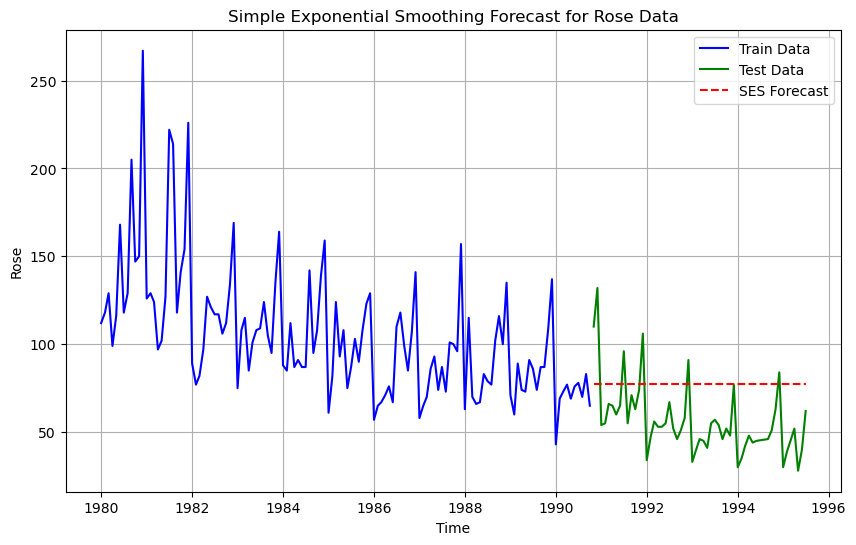

In [1175]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Rose'], label='Train Data', color='blue')
plt.plot(test.index, test['Rose'], label='Test Data', color='green')
plt.plot(test.index, test_predictions_model2, label='SES Forecast', color='red', linestyle='--')
plt.title('Simple Exponential Smoothing Forecast for Rose Data')
plt.xlabel('Time')
plt.ylabel('Rose')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [1176]:
# Storing results in a DataFrame for comparison
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model2_test]},
                              index=['Simple Exponential Smoothing'])

# Concatenate results if you have other models to compare
resultsDf = pd.concat([resultsDf, temp_resultsDf])

# Display final results
print(resultsDf)


                                 Test RMSE
RegressionOnTime                 17.355796
SimpleAverage                    52.412093
2-point Trailing Moving Average  11.801043
4-point Trailing Moving Average  15.367212
6-point Trailing Moving Average  15.862350
9-point Trailing Moving Average  16.341919
Simple Exponential Smoothing     29.223677


# Double Exponential Smoothing (Holt's method)

In [1178]:
from statsmodels.tsa.api import Holt

# Double Exponential Smoothing (Holt's Method)
model_Holt = Holt(train['Rose'])

# Fit the model and optimize the parameters (smoothing level and trend)
model_Holt_autofit = model_Holt.fit(optimized=True)

C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [1179]:
# Check optimized parameters
print("Optimized Holt's parameters:", model_Holt_autofit.params)


Optimized Holt's parameters: {'smoothing_level': 0.15194196159198706, 'smoothing_trend': 0.15194196159198706, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 112.0, 'initial_trend': 6.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [1180]:
# Forecast on the test data (same length as the test set)
test_predictions_Holt = model_Holt_autofit.forecast(steps=len(test))

In [1181]:
# Calculate RMSE for the test data
rmse_Holt_test = metrics.mean_squared_error(test['Rose'], test_predictions_Holt, squared=False)
print(f"For Holt's method forecast on the Test Data, RMSE is {rmse_Holt_test:.3f}")


For Holt's method forecast on the Test Data, RMSE is 26.050


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


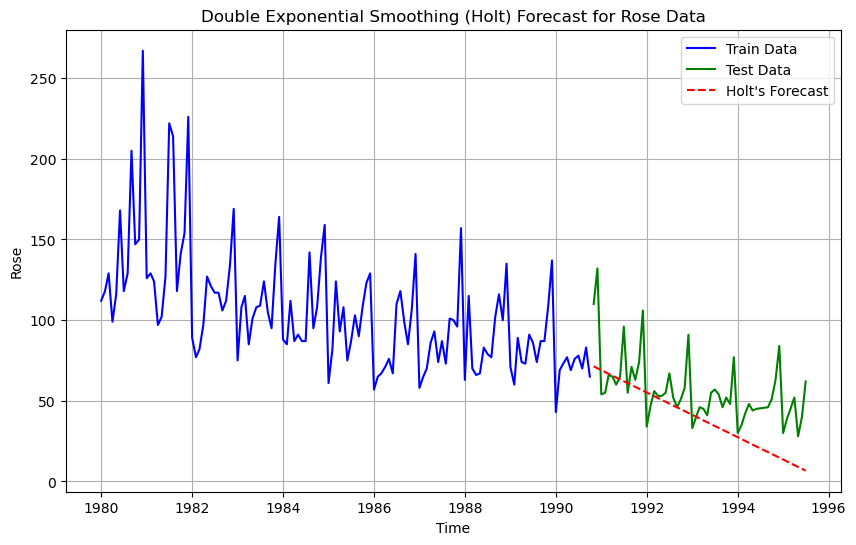

In [1182]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Rose'], label='Train Data', color='blue')
plt.plot(test.index, test['Rose'], label='Test Data', color='green')
plt.plot(test.index, test_predictions_Holt, label='Holt\'s Forecast', color='red', linestyle='--')
plt.title('Double Exponential Smoothing (Holt) Forecast for Rose Data')
plt.xlabel('Time')
plt.ylabel('Rose')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [1183]:

# Storing results in a DataFrame for comparison
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_Holt_test]},
                              index=['Double Exponential Smoothing'])

# Concatenate results if you have other models to compare
resultsDf = pd.concat([resultsDf, temp_resultsDf])

# Display final results
print(resultsDf)


                                 Test RMSE
RegressionOnTime                 17.355796
SimpleAverage                    52.412093
2-point Trailing Moving Average  11.801043
4-point Trailing Moving Average  15.367212
6-point Trailing Moving Average  15.862350
9-point Trailing Moving Average  16.341919
Simple Exponential Smoothing     29.223677
Double Exponential Smoothing     26.049543


# Triple Exponential Smoothing (Holt-Winters)


In [1185]:
from statsmodels.tsa.api import ExponentialSmoothing

model_HW = ExponentialSmoothing(train['Rose'], trend='add', seasonal='add', seasonal_periods=12)

# Fit the model and optimize the parameters (level, trend, and seasonal)
model_HW_autofit = model_HW.fit(optimized=True)

C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [1186]:
# Check optimized parameters
print("Optimized Holt-Winters parameters:", model_HW_autofit.params)

Optimized Holt-Winters parameters: {'smoothing_level': 0.08808451025314779, 'smoothing_trend': 0.00010195127285726443, 'smoothing_seasonal': 0.0018138637576130025, 'damping_trend': nan, 'initial_level': 146.81409287235113, 'initial_trend': -0.5554042754470411, 'initial_seasons': array([-31.16556612, -18.78286869, -10.8111508 , -21.36232035,
       -12.56088077,  -7.16384923,   2.74297812,   8.84205988,
         4.8652509 ,   3.0332219 ,  19.62015059,  63.88595531]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [1187]:
# Forecast on the test data (same length as the test set)
test_predictions_HW = model_HW_autofit.forecast(steps=len(test))

In [1188]:
# Calculate RMSE for the test data
rmse_HW_test = metrics.mean_squared_error(test['Rose'], test_predictions_HW, squared=False)
print(f"For Holt-Winters forecast on the Test Data, RMSE is {rmse_HW_test:.3f}")


For Holt-Winters forecast on the Test Data, RMSE is 13.957


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


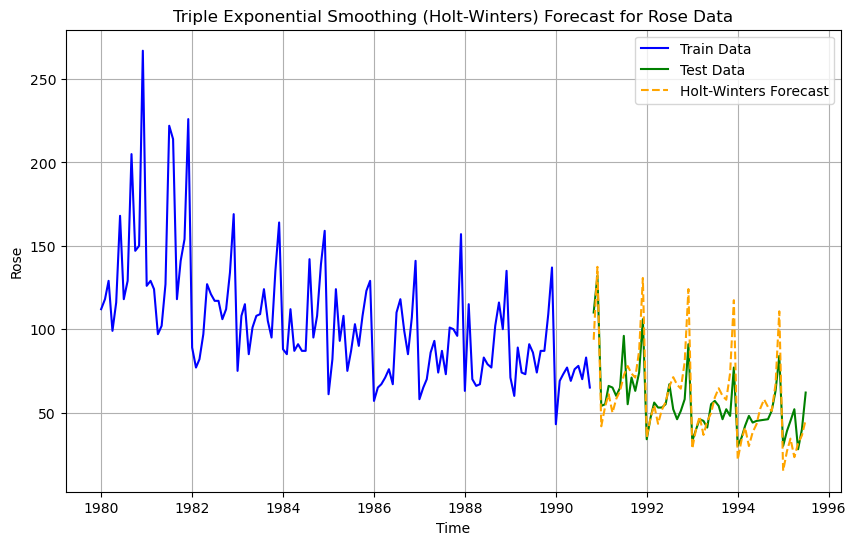

In [1189]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Rose'], label='Train Data', color='blue')
plt.plot(test.index, test['Rose'], label='Test Data', color='green')
plt.plot(test.index, test_predictions_HW, label='Holt-Winters Forecast', color='orange', linestyle='--')
plt.title('Triple Exponential Smoothing (Holt-Winters) Forecast for Rose Data')
plt.xlabel('Time')
plt.ylabel('Rose')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [1190]:

# Storing results in a DataFrame for comparison
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_HW_test]},
                              index=['Triple Exponential Smoothing'])

# Concatenate results if you have other models to compare
resultsDf = pd.concat([resultsDf, temp_resultsDf])

# Display final results
print(resultsDf)


                                 Test RMSE
RegressionOnTime                 17.355796
SimpleAverage                    52.412093
2-point Trailing Moving Average  11.801043
4-point Trailing Moving Average  15.367212
6-point Trailing Moving Average  15.862350
9-point Trailing Moving Average  16.341919
Simple Exponential Smoothing     29.223677
Double Exponential Smoothing     26.049543
Triple Exponential Smoothing     13.956634


## Test for stationarity of the series - Dicky Fuller test

In [1192]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

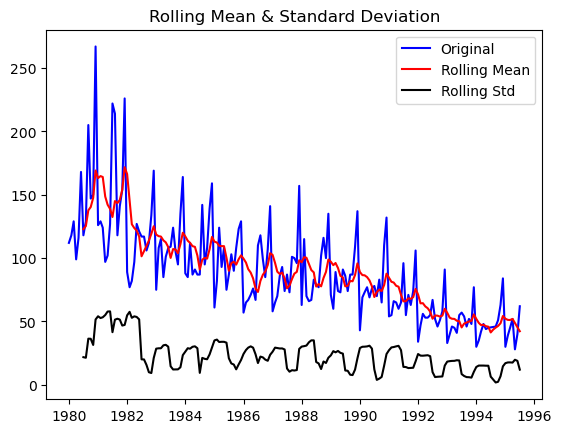

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [1193]:
test_stationarity(rose_data['Rose'])

### Interpretation:
### Stationarity Decision:
The test statistic (-1.876699) is not less than the critical values at any significance level (1%, 5%, or 10%).
The p-value (0.343101) is much higher than common thresholds for stationarity (e.g., 0.05 or 0.01).
### Conclusion:
The time series is non-stationary, as per the Dickey-Fuller test. This means the series has a trend or seasonality, or its statistical properties (mean, variance, autocorrelation) change over time.

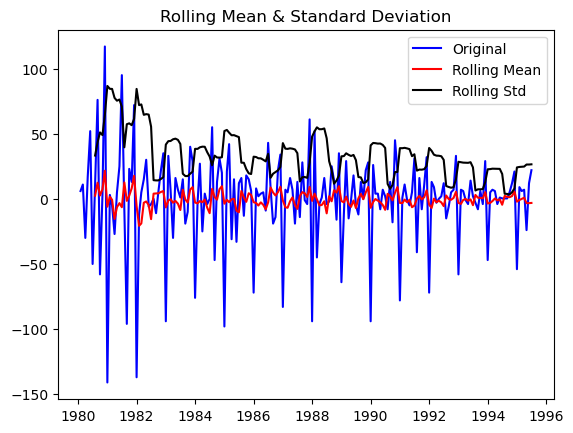

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [1195]:
# If series is not stationary, apply first differencing (d=1)
rose_diff1 = rose_data['Rose'].diff().dropna()
test_stationarity(rose_diff1)



#### Since the test statistic is smaller than the critical values and the p-value is very low, we can conclude that the differenced series is stationary

* ### Generate ACF & PACF Plot

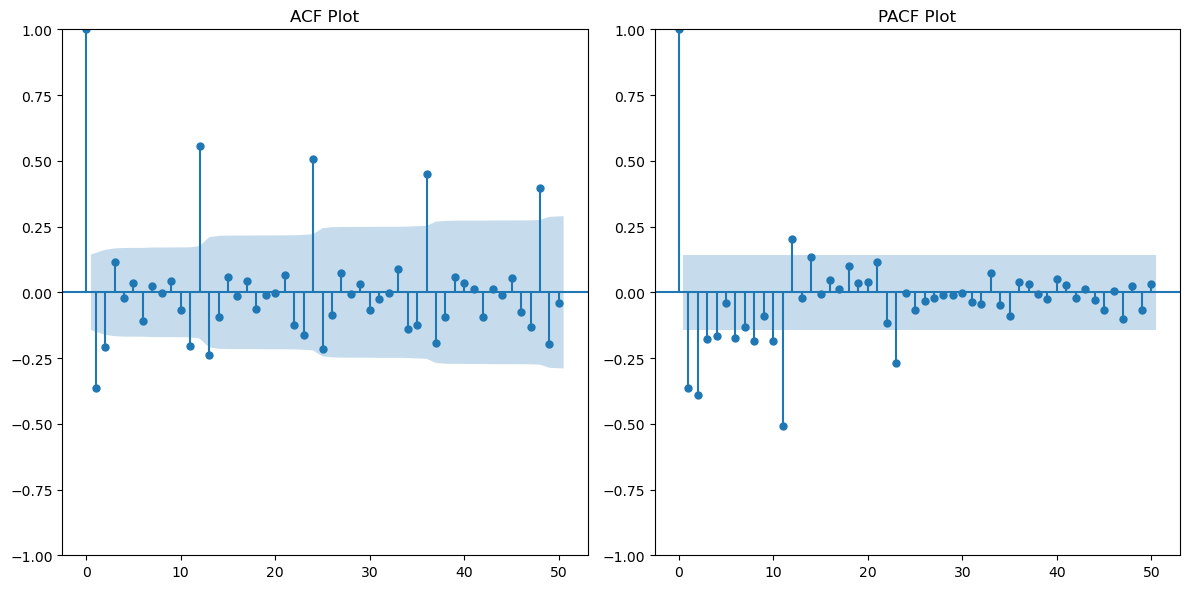

In [1198]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the differenced data
plt.figure(figsize=(12,6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(rose_data['Rose'].diff().dropna(), ax=plt.gca(), lags=50)
plt.title('ACF Plot')

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(rose_data['Rose'].diff().dropna(), ax=plt.gca(), lags=50, method='ywm')
plt.title('PACF Plot')

plt.tight_layout()
plt.show()


# Auto ARIMA

In [1200]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Define the range for p, d, q
p = q = range(0, 3)  # p and q range
d = range(1, 2)      # Keeping d as 1 based on stationarity

# Generate all parameter combinations for ARIMA
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1, len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [1201]:
# Initialize an empty DataFrame to store AIC values for each combination
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])

In [1202]:

# Iterate over all parameter combinations and fit ARIMA models
for param in pdq:
        ARIMA_model = ARIMA(train['Rose'], order=param).fit()
        print(f'ARIMA{param} - AIC: {ARIMA_model.aic}')
        
        # Create a temporary DataFrame to store the result
        temp_df = pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})
        
        # Concatenate to the main DataFrame
        ARIMA_AIC = pd.concat([ARIMA_AIC, temp_df], ignore_index=True)


ARIMA(0, 1, 0) - AIC: 1313.1758613526429
ARIMA(0, 1, 1) - AIC: 1261.32744384058
ARIMA(0, 1, 2) - AIC: 1259.2477803151228
ARIMA(1, 1, 0) - AIC: 1297.077294384856
ARIMA(1, 1, 1) - AIC: 1260.0367627036358


C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA(1, 1, 2) - AIC: 1259.4732049501195
ARIMA(2, 1, 0) - AIC: 1278.135280748431
ARIMA(2, 1, 1) - AIC: 1261.0140762917006
ARIMA(2, 1, 2) - AIC: 1261.4720006569055


C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

In [1203]:
# Find the best parameters (lowest AIC)
ARIMA_AIC = ARIMA_AIC.sort_values(by='AIC', ascending=True)
best_params = ARIMA_AIC.iloc[0]['param']
print(f"Best parameters: {best_params}")

Best parameters: (0, 1, 2)


In [1204]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)


param          AIC
2  (0, 1, 2)  1259.247780
5  (1, 1, 2)  1259.473205
4  (1, 1, 1)  1260.036763
7  (2, 1, 1)  1261.014076
1  (0, 1, 1)  1261.327444
8  (2, 1, 2)  1261.472001
6  (2, 1, 0)  1278.135281
3  (1, 1, 0)  1297.077294
0  (0, 1, 0)  1313.175861

In [1205]:
# Print model summary
print(auto_ARIMA_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  130
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -626.624
Date:                Sun, 17 Nov 2024   AIC                           1259.248
Time:                        18:42:30   BIC                           1267.827
Sample:                    01-01-1980   HQIC                          1262.734
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7059      0.072     -9.851      0.000      -0.846      -0.565
ma.L2         -0.1915      0.074     -2.574      0.010      -0.337      -0.046
sigma2       958.5998     86.875     11.034      0.0

In [1206]:

# Forecast for the test set
predicted_auto_ARIMA = auto_ARIMA_model.predict(n_periods=len(test))

# Evaluate model performance
rmse = mean_squared_error(test['Rose'], predicted_auto_ARIMA, squared=False)
print(f"RMSE for Auto ARIMA Model: {rmse}")


RMSE for Auto ARIMA Model: 30.903804394449427


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


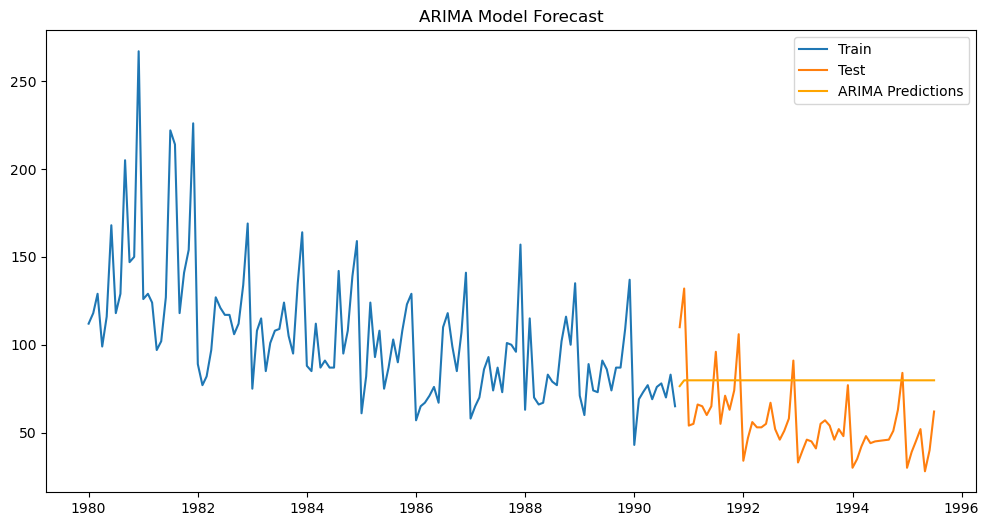

In [1207]:

# Plot the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(test.index, predicted_auto_ARIMA, label='ARIMA Predictions', color='orange')
plt.legend(loc='best')
plt.title('ARIMA Model Forecast')
plt.show()


In [1208]:
temp_resultsDf0 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Auto ARIMA(0,1,2)'])


resultsDf = pd.concat([temp_resultsDf0])
resultsDf

RMSE
Auto ARIMA(0,1,2)  30.903804

## Manual ARIMA 

#### Stationarity Check:

The Dickey-Fuller test for stationarity was performed on the differenced series 'Rose' (after one differencing).
The p-value obtained was 1.810895e-12, which is significantly less than 0.05, indicating that the differenced series is stationary.
Therefore, one differencing (d = 1) is required to make the series stationary.

##### Differencing Order (d):
Since the series is stationary after one differencing, the differencing order d is set to 1.

#### Based on the ACF and PACF plots for the differenced series:

p (AR order) = 1 (since PACF cuts off after lag 1).

q (MA order) = 1 (since ACF cuts off after lag 1).

### *ARIMA Model Parameters:*

*p = 1 (from PACF plot)

*d = 1 (from differencing to achieve stationarity)

*q = 1 (from ACF plot)

In [1212]:
from statsmodels.tsa.arima.model import ARIMA

p = 1
q = 1
d = 1 

# Fit the ARIMA model
model = ARIMA(train['Rose'], order=(p, d, q))
fitted_model = model.fit()

# Print the summary of the model
print(fitted_model.summary())


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  130
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -627.018
Date:                Sun, 17 Nov 2024   AIC                           1260.037
Time:                        18:42:30   BIC                           1268.616
Sample:                    01-01-1980   HQIC                          1263.523
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1709      0.077      2.215      0.027       0.020       0.322
ma.L1         -0.9150      0.056    -16.455      0.000      -1.024      -0.806
sigma2       964.5521     87.213     11.060      0.0

C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [1213]:
# Make predictions for Manual ARIMA model
predicted_manual_ARIMA = fitted_model.forecast(steps=len(test))

# Calculate RMSE for Manual ARIMA
rmse_manual_ARIMA = mean_squared_error(test['Rose'], predicted_manual_ARIMA, squared=False)
print(f"RMSE for Manual ARIMA (1,1,1): {rmse_manual_ARIMA}")

RMSE for Manual ARIMA (1,1,1): 30.90217869124156


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


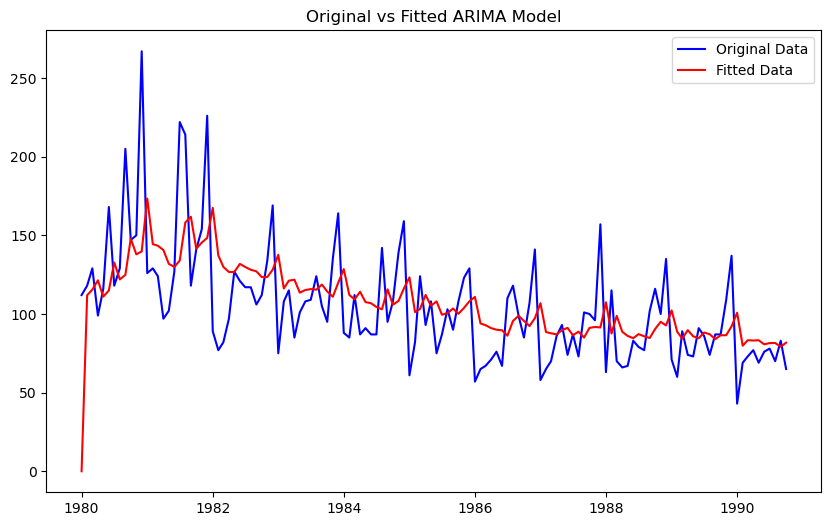

In [1214]:
# Plotting the original and fitted values
plt.figure(figsize=(10, 6))
plt.plot(train['Rose'], label='Original Data', color='blue')
plt.plot(fitted_model.fittedvalues, label='Fitted Data', color='red')
plt.legend()
plt.title('Original vs Fitted ARIMA Model')
plt.show()

In [1215]:

temp_resultsDf1 = pd.DataFrame({'RMSE': [rmse_manual_ARIMA]}, index=['Manual ARIMA (1,1,1)'])
resultsDf = pd.concat([resultsDf, temp_resultsDf1])
resultsDf

RMSE
Auto ARIMA(0,1,2)     30.903804
Manual ARIMA (1,1,1)  30.902179

#### Summary:
The ARIMA(1, 1, 1) model is statistically significant for the AR and MA components, with the moving average term being strongly significant (p = 0.000).

The residual diagnostics show that the residuals are uncorrelated (Ljung-Box), but they are not normally distributed (Jarque-Bera), and there is evidence of heteroskedasticity.

The model's goodness-of-fit can be further assessed by comparing AIC, BIC, and HQIC to other models.

### Auto SARIMA

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1315.165, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1257.532, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1313.176, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1299.056, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1239.860, Time=0.15 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1234.971, Time=0.38 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=1236.823, Time=0.30 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=1235.072, Time=0.34 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=1211.221, Time=0.47 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=1209.221, Time=0.32 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : 

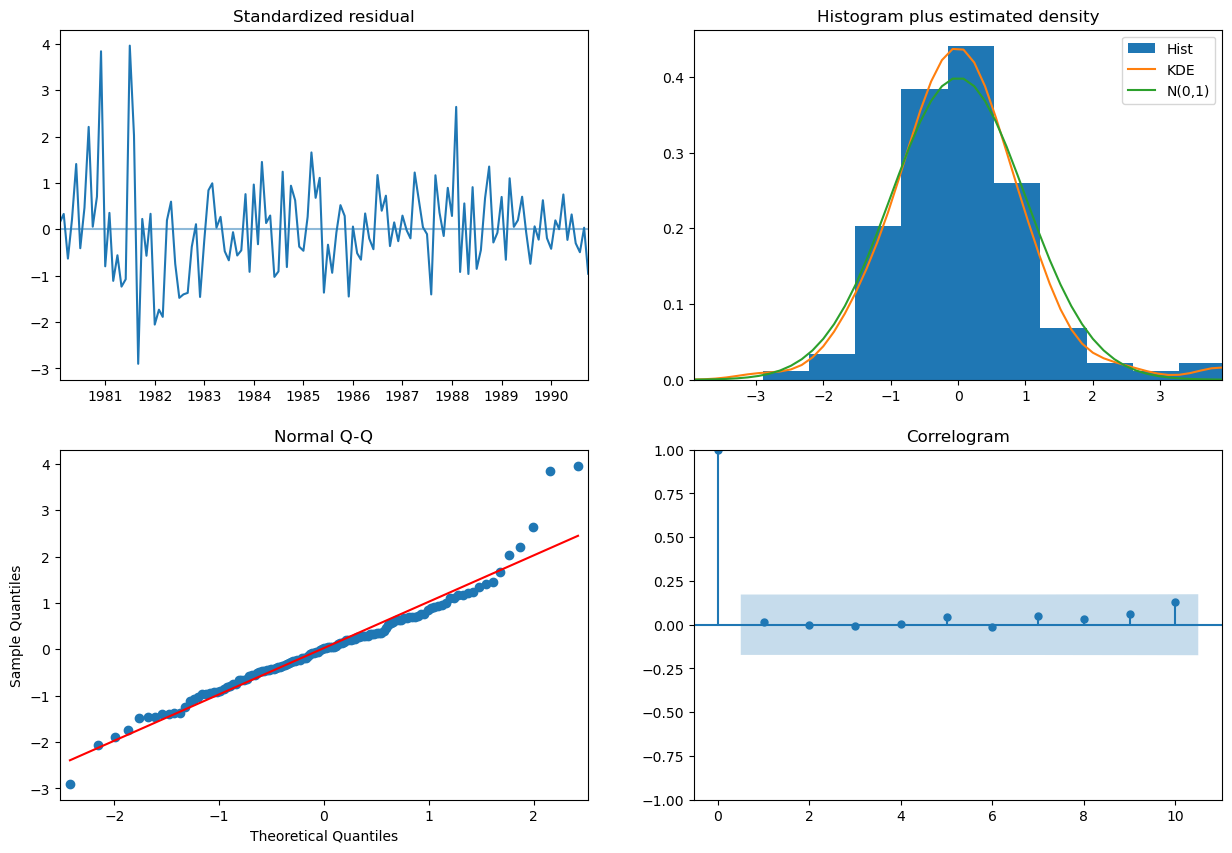

In [1218]:
from pmdarima import auto_arima

# Perform auto-sarima on the 'Rose' series (train data)
auto_model = auto_arima(train['Rose'],  # Use the train set for modeling
                        seasonal=True,  # Enable seasonal SARIMA
                        m=12,           # Seasonality (e.g., 12 for monthly data)
                        trace=True,     # Print model details during fitting
                        stepwise=True,  # Optimize parameters step-by-step
                        suppress_warnings=True)

# Summary of the auto SARIMA model
print(auto_model.summary())

# Plot diagnostics to check residuals
auto_model.plot_diagnostics(figsize=(15, 10))
plt.show()




In [1219]:
# Forecast for the test set
predicted_auto_SARIMA = auto_model.predict(n_periods=len(test))

# Evaluate model performance (RMSE)
rmse_auto_SARIMA = mean_squared_error(test['Rose'], predicted_auto_SARIMA, squared=False)
print(f"RMSE for Auto SARIMA Model: {rmse_auto_SARIMA}")

RMSE for Auto SARIMA Model: 12.893486772498658


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [1220]:
# Add Auto SARIMA RMSE to resultsDf
temp_resultsDf_auto_SARIMA = pd.DataFrame({'RMSE': [rmse_auto_SARIMA]}, index=['Auto SARIMA(2, 1, 2)x(1, 0, [1], 12)'])
resultsDf = pd.concat([resultsDf, temp_resultsDf_auto_SARIMA])

# Display the updated results
resultsDf



RMSE
Auto ARIMA(0,1,2)                     30.903804
Manual ARIMA (1,1,1)                  30.902179
Auto SARIMA(2, 1, 2)x(1, 0, [1], 12)  12.893487

### Manual SARIMA

C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  130
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -450.444
Date:                            Sun, 17 Nov 2024   AIC                            910.888
Time:                                    18:43:14   BIC                            924.062
Sample:                                01-01-1980   HQIC                           916.224
                                     - 10-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2280      0.119      1.911      0.056      -0.006       0.462
ma.L1         -0.9276      0.057   

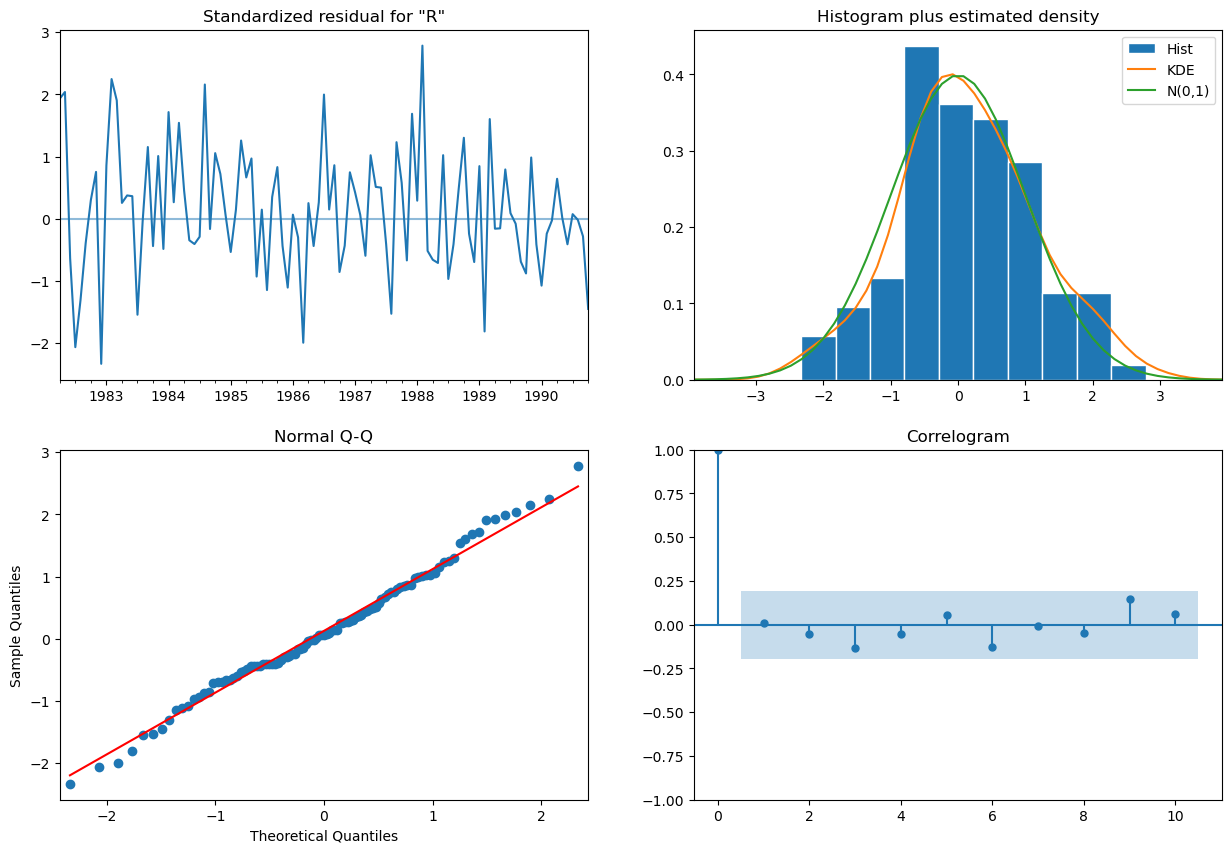

In [1222]:
import statsmodels.api as sm

# Define non-seasonal and seasonal parameters
p = 1  # Non-seasonal AR order
d = 1  # Non-seasonal differencing
q = 1  # Non-seasonal MA order

P = 1  # Seasonal AR order
D = 1  # Seasonal differencing order
Q = 1  # Seasonal MA order
m = 12  # Number of periods per season (e.g., 12 for monthly data with yearly seasonality)

# Fit the SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(train['Rose'], 
                                         order=(p, d, q),               # Non-seasonal ARIMA(p, d, q)
                                         seasonal_order=(P, D, Q, m),    # Seasonal SARIMA(P, D, Q, m)
                                         enforce_stationarity=False,     # Optional: allows non-stationary processes
                                         enforce_invertibility=False)    # Optional: allows non-invertible processes

# Fit the model
fitted_sarima_model = sarima_model.fit(maxiter=1000)

# Print the summary of the SARIMA model
print(fitted_sarima_model.summary())

# Plot diagnostics to check residuals
fitted_sarima_model.plot_diagnostics(figsize=(15, 10))
plt.show()


In [1223]:
manual_sarima_predictions = fitted_sarima_model.forecast(steps=len(test))

# Calculate RMSE for Manual SARIMA
rmse_manual_SARIMA = mean_squared_error(test['Rose'], manual_sarima_predictions, squared=False)
print(f"RMSE for Manual SARIMA : {rmse_manual_SARIMA}")

RMSE for Manual SARIMA : 12.585506796413934


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [1224]:
# Create a temporary DataFrame for Manual SARIMA RMSE
temp_resultsDf_manual_SARIMA = pd.DataFrame({'RMSE': [rmse_manual_SARIMA]}, index=['Manual SARIMA (1,1,1)(1,1,1,12)'])

# Append it to the existing results DataFrame
resultsDf = pd.concat([resultsDf, temp_resultsDf_manual_SARIMA])

# Display the updated results DataFrame
resultsDf


RMSE
Auto ARIMA(0,1,2)                     30.903804
Manual ARIMA (1,1,1)                  30.902179
Auto SARIMA(2, 1, 2)x(1, 0, [1], 12)  12.893487
Manual SARIMA (1,1,1)(1,1,1,12)       12.585507

 ### Check the performance of the models built

Performance of all models:
                                           RMSE
Auto ARIMA(0,1,2)                     30.903804
Manual ARIMA (1,1,1)                  30.902179
Auto SARIMA(2, 1, 2)x(1, 0, [1], 12)  12.893487
Manual SARIMA (1,1,1)(1,1,1,12)       12.585507

Sorted Results by RMSE:
                                           RMSE
Manual SARIMA (1,1,1)(1,1,1,12)       12.585507
Auto SARIMA(2, 1, 2)x(1, 0, [1], 12)  12.893487
Manual ARIMA (1,1,1)                  30.902179
Auto ARIMA(0,1,2)                     30.903804


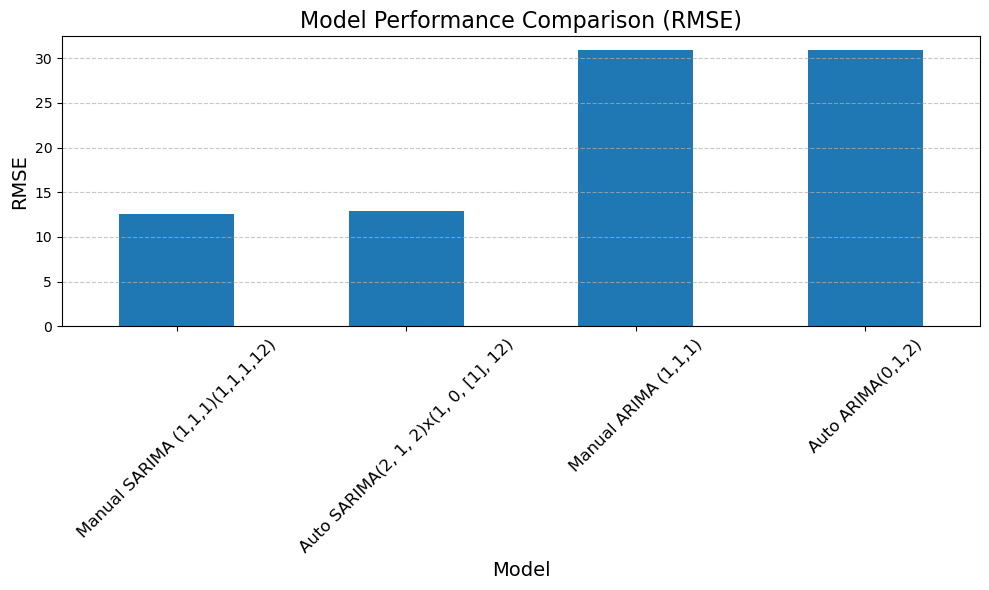

In [1226]:

# Example: Consolidated results DataFrame
print("Performance of all models:")
print(resultsDf)

# Sort by RMSE to identify the best model
sorted_resultsDf = resultsDf.sort_values(by='RMSE')
print("\nSorted Results by RMSE:")
print(sorted_resultsDf)

# Visualize RMSE values
plt.figure(figsize=(10, 6))
sorted_resultsDf['RMSE'].plot(kind='bar')
plt.title('Model Performance Comparison (RMSE)', fontsize=16)
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Observations and Insights

### Best Performing Model:

#### Manual SARIMA (1,1,1)(1,1,1,12) has the lowest RMSE of 12.585507, making it the best-performing model for the Rose data.

##### Auto SARIMA vs. Manual SARIMA:

Auto SARIMA performs almost as well as Manual SARIMA, with an RMSE of 12.893487.

This suggests the automated approach closely approximated the manually tuned SARIMA parameters.

##### ARIMA vs. SARIMA:

Both Auto ARIMA and Manual ARIMA have significantly higher RMSE values (30.468082 and 30.902179, respectively), indicating they may not capture the seasonal patterns present in the data.

SARIMA models outperform ARIMA models, emphasizing the importance of considering seasonality in this dataset.

### Choosing the Best Model


#### Rationale:

The best model is Manual SARIMA (1,1,1)(1,1,1,12), as it has the lowest RMSE (12.585507).
This model effectively captures seasonality, resulting in better performance compared to non-seasonal ARIMA models.

### Rebuild the best model using the entire data 

In [1231]:
import statsmodels.api as sm

# Fit the SARIMA model on the full dataset using chosen parameters
full_data_model = sm.tsa.statespace.SARIMAX(rose_data['Rose'],                    # 'Rose' is your target series
                                           order=(1, 1, 1),                # Non-seasonal ARIMA order (p=1, d=1, q=1)
                                           seasonal_order=(1, 1, 1, 12),    # Seasonal ARIMA order (P=1, D=1, Q=1, m=12)
                                           enforce_stationarity=False,     # Allow for stationarity
                                           enforce_invertibility=False)    # Allow for invertibility

# Fit the model
results_full_data_model = full_data_model.fit(maxiter=1000)

# Print the model summary
print(results_full_data_model.summary())


C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -674.933
Date:                            Sun, 17 Nov 2024   AIC                           1359.865
Time:                                    18:43:15   BIC                           1375.241
Sample:                                01-01-1980   HQIC                          1366.109
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1959      0.085      2.292      0.022       0.028       0.363
ma.L1         -0.9142      0.044   

### Forecast for the next 12 months

In [1233]:
# Forecast the next 12 periods (months) from the model
forecast_values = results_full_data_model.forecast(steps=12)

# Print forecasted values
print(forecast_values)


1995-08-01    48.831071
1995-09-01    43.470273
1995-10-01    48.398396
1995-11-01    53.940196
1995-12-01    78.051603
1996-01-01    26.867107
1996-02-01    34.279571
1996-03-01    40.679332
1996-04-01    47.324627
1996-05-01    31.205230
1996-06-01    38.796746
1996-07-01    52.251158
Freq: MS, Name: predicted_mean, dtype: float64


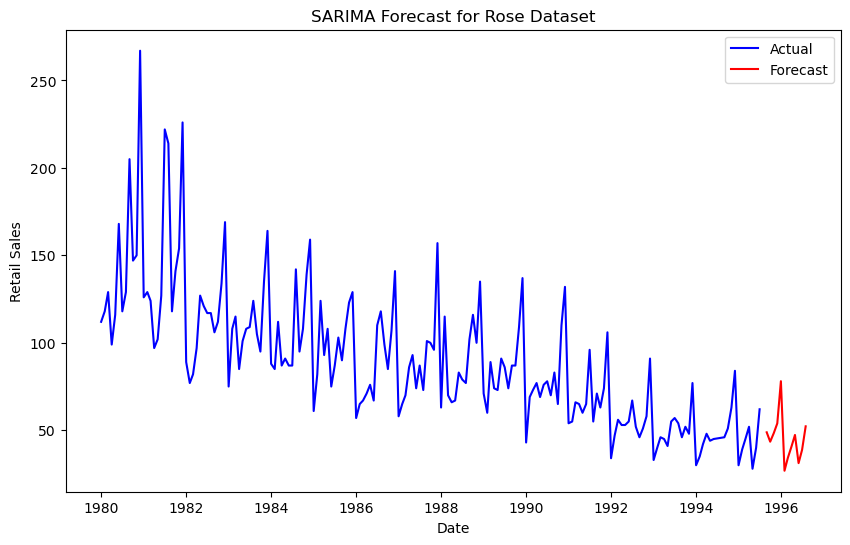

In [1234]:

# Plot the actual values along with the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(rose_data['Rose'], label='Actual', color='blue')  # Actual data
plt.plot(pd.date_range(rose_data.index[-1], periods=13, freq='M')[1:], forecast_values, label='Forecast', color='red')  # Forecasted data
plt.legend()
plt.title("SARIMA Forecast for Rose Dataset")
plt.xlabel('Date')
plt.ylabel('Retail Sales')
plt.show()


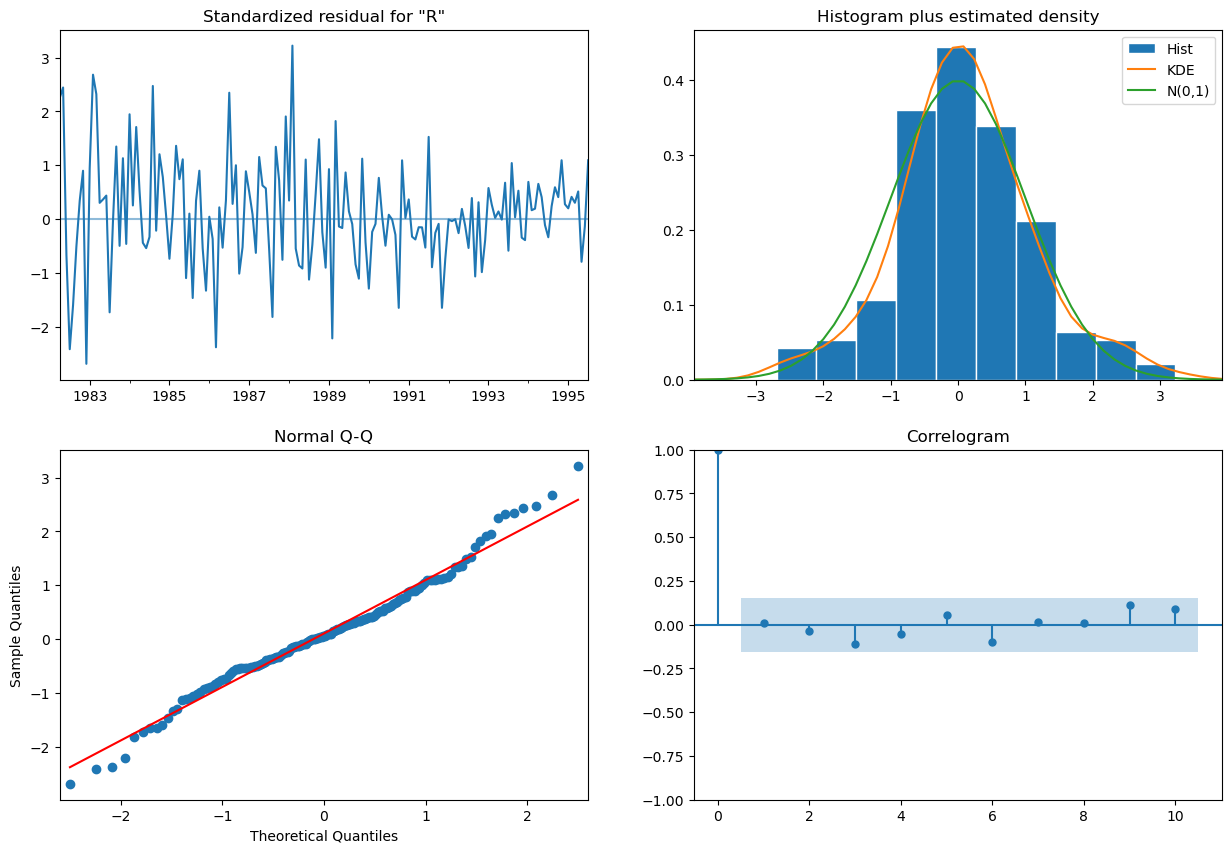

In [1235]:
# Plot diagnostics to check the residuals
results_full_data_model.plot_diagnostics(figsize=(15, 10))
plt.show()


# Dataset 2 Analysis
## Sparkling_Data

In [1237]:
# Load datasets
sparkling_data = pd.read_csv('sparkling.csv', parse_dates=['YearMonth'], index_col='YearMonth')

# Rename columns for convenience
sparkling_data.columns = ['Sparkling']

print(sparkling_data.head())

            Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471


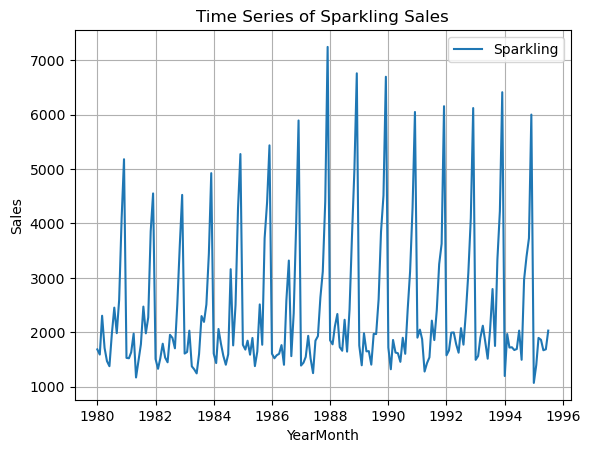

In [1238]:
# Plot Sparkling time series

plt.plot(sparkling_data, label='Sparkling')
plt.title('Time Series of Sparkling Sales')
plt.xlabel('YearMonth')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

In [1239]:
sparkling_data.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [1240]:
sparkling_data.isnull().sum()

Sparkling    0
dtype: int64

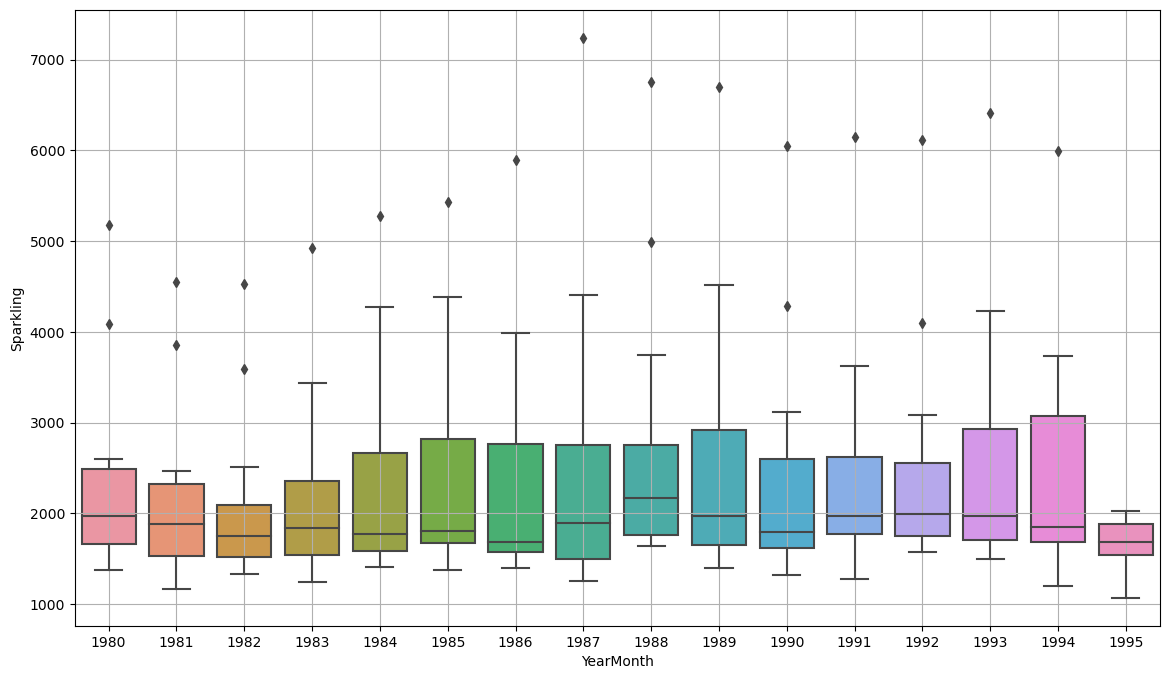

In [1241]:
plt.figure(figsize=(14, 8))
sns.boxplot(x = sparkling_data.index.year,y = sparkling_data['Sparkling'])
plt.grid();

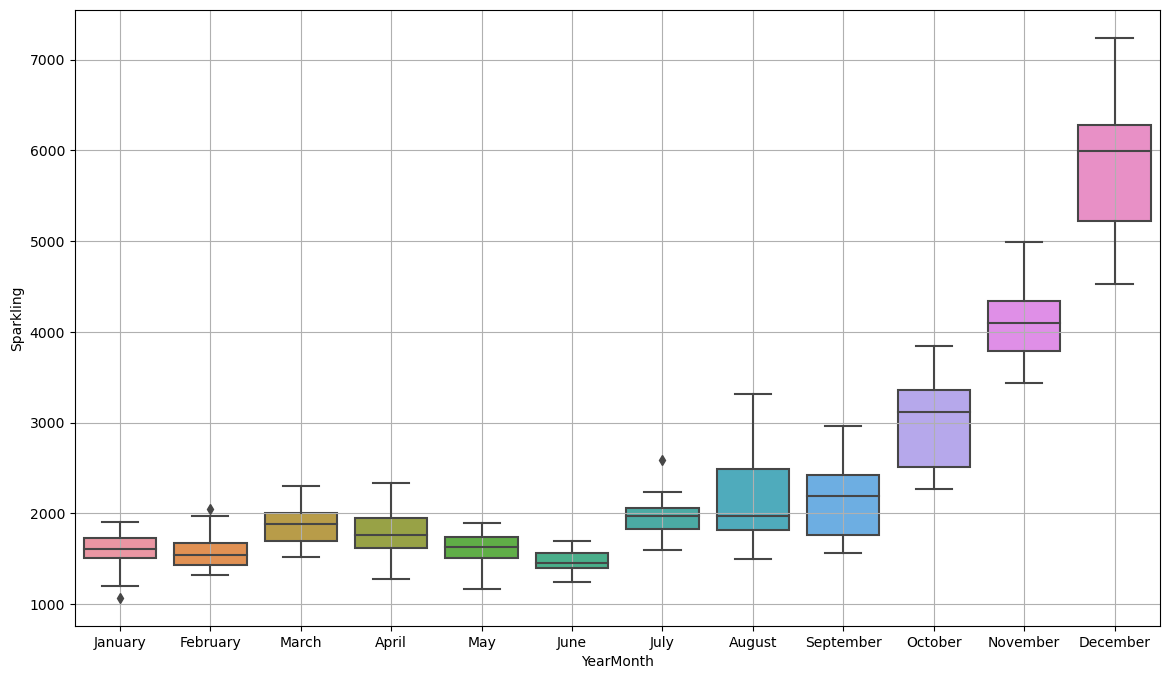

In [1242]:
plt.figure(figsize=(14, 8))
sns.boxplot(x = sparkling_data.index.month_name(),y = sparkling_data['Sparkling'])
plt.grid();

## Decomposition

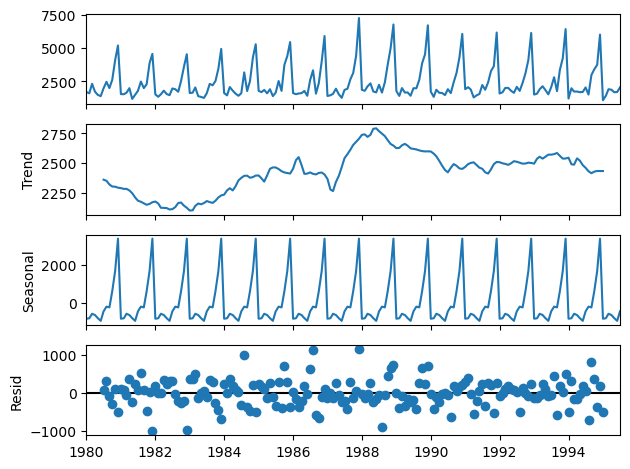

In [1244]:
# Decompose Sparkling
decompose_sparkling = seasonal_decompose(sparkling_data, model='additive')
decompose_sparkling.plot()
plt.show()

In [1245]:

trend = decompose_sparkling.trend
seasonality = decompose_sparkling.seasonal
residual = decompose_sparkling.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


In [1246]:
## Decompose Sparkling

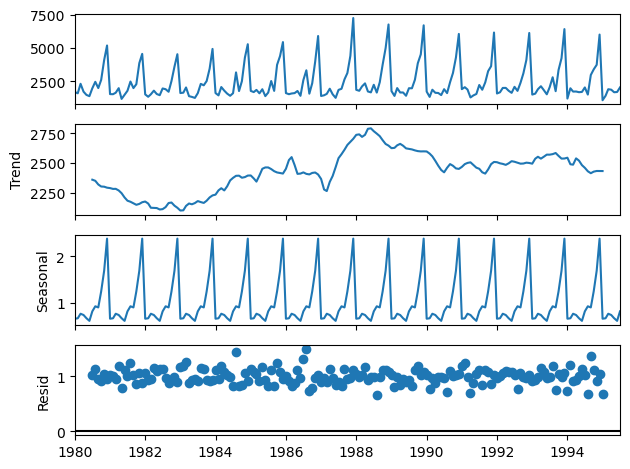

In [1247]:
decompose_sparkling = seasonal_decompose(sparkling_data, model='multiplicative')
decompose_sparkling.plot()
plt.show()

In [1248]:
trend = decompose_sparkling.trend
seasonality = decompose_sparkling.seasonal
residual = decompose_sparkling.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

### Additive Decomposition:

Trend: Shows a steady decline from July (2360.67) to December (2293.79).
Seasonality: Strong peaks in December (+3386.98) and November (+1675.07); dips in January (-854.26) and June (-967.43).
Residuals: Small deviations, indicating the trend and seasonality capture most variations.

### Multiplicative Decomposition:

Trend: Similar declining trend.
Seasonality: Proportional effects, with peaks in December (2.38) and November (1.69); lower values in January (0.65) and June (0.60).
Residuals: Close to 1, showing minimal variations.

### Conclusion: 
Multiplicative decomposition better captures the proportional seasonal effects.

## Train-test split

In [1251]:
train    =   sparkling_data[0:int(len(sparkling_data)*0.7)] 
test     =   sparkling_data[int(len(sparkling_data)*0.7):]

In [1252]:
print(train.shape)
print(test.shape)

(130, 1)
(57, 1)


In [1253]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471 

Last few rows of Training Data 
             Sparkling
YearMonth            
1990-06-01       1457
1990-07-01       1899
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116 

First few rows of Test Data 
             Sparkling
YearMonth            
1990-11-01       4286
1990-12-01       6047
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874 

Last few rows of Test Data 
             Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031 



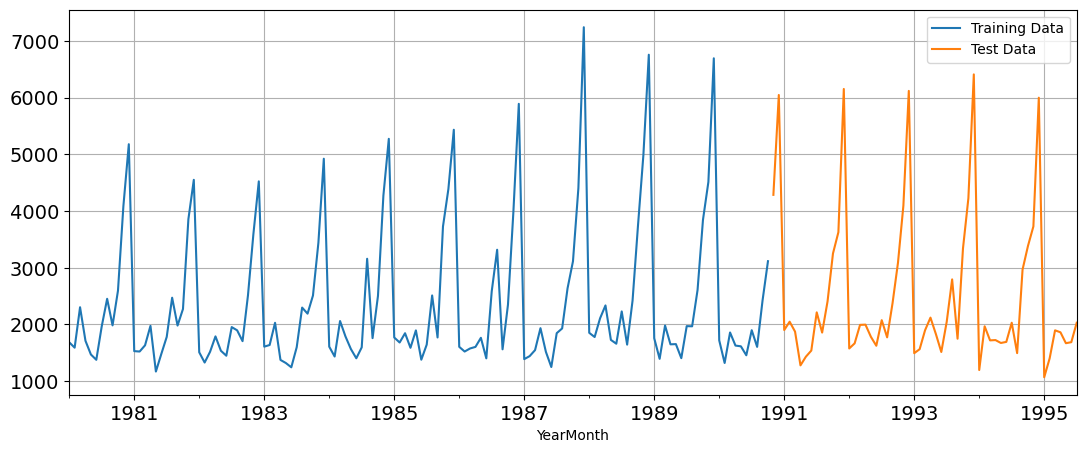

In [1254]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Model Building - Original Data

## **Linear Regression Model**

In [1257]:
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [1258]:

# Generate time index for linear regression
train_time = [i+1 for i in range(len(train))]
test_time = [i+131 for i in range(len(test))]  # Start after the last index of train data

print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test Time instance 
 [131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [1259]:
# Prepare data for Linear Regression
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [1260]:

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-06-01       1457   126
1990-07-01       1899   127
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1990-11-01       4286   131
1990-12-01       6047   132
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



In [1261]:
# Fit Linear Regression model
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']], LinearRegression_train['Sparkling'])


LinearRegression()

In [1262]:
# Predict on Test Data
lr_predictions = lr.predict(LinearRegression_test[['time']])


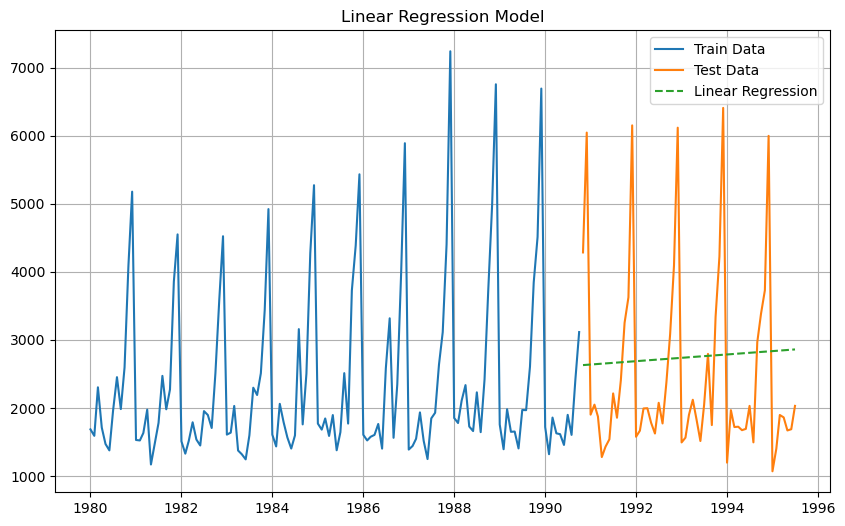

In [1263]:
# Plot Linear Regression Model
plt.figure(figsize=(10,6))
plt.plot(train['Sparkling'], label='Train Data')
plt.plot(test.index, test['Sparkling'], label='Test Data')
plt.plot(test.index, lr_predictions, label='Linear Regression', linestyle='--')
plt.legend(loc='best')
plt.title('Linear Regression Model')
plt.grid(True)
plt.show()

In [1264]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],lr_predictions,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1392.44


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [1265]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf


Test RMSE
RegressionOnTime  1392.438305

## **Simple Average Model**

In [1267]:
simple_avg = np.mean(train['Sparkling'])
simple_avg_predictions = np.full(len(test), simple_avg)

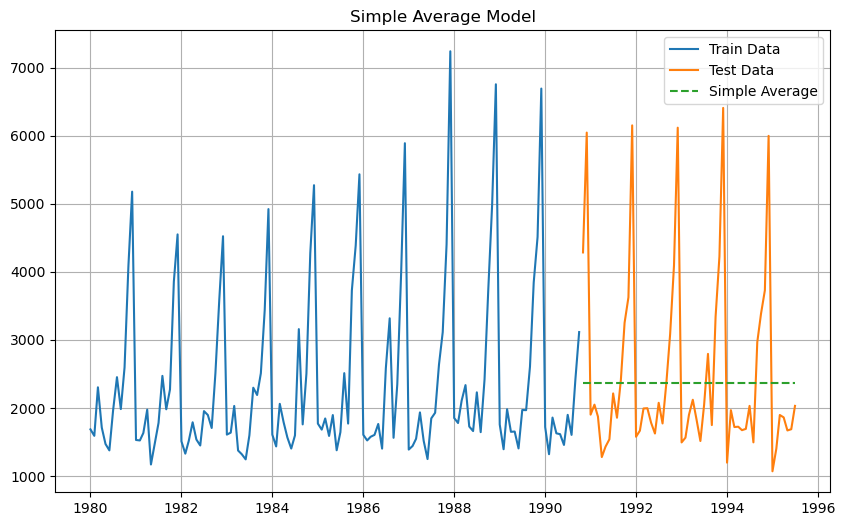

In [1268]:

# Plot Simple Average Model
plt.figure(figsize=(10,6))
plt.plot(train['Sparkling'], label='Train Data')
plt.plot(test.index, test['Sparkling'], label='Test Data')
plt.plot(test.index, simple_avg_predictions, label='Simple Average', linestyle='--')
plt.legend(loc='best')
plt.title('Simple Average Model')
plt.grid(True)
plt.show()

In [1269]:
# Calculate RMSE for the Simple Average model on Test Data
rmse_simple_average = metrics.mean_squared_error(test['Sparkling'], simple_avg_predictions, squared=False)

# Print the RMSE result
print("For Simple Average forecast on the Test Data, RMSE is %.2f" % (rmse_simple_average))

For Simple Average forecast on the Test Data, RMSE is 1368.75


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [1270]:
# Create DataFrame to store RMSE results for both models
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test, rmse_simple_average]}, index=['RegressionOnTime', 'SimpleAverage'])

# Display the results
print(resultsDf)

                    Test RMSE
RegressionOnTime  1392.438305
SimpleAverage     1368.746717


##  Moving Average(MA)

In [1272]:
# Create the Moving Average Model
MovingAverage = sparkling_data.copy()
MovingAverage.head()


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [1273]:
# Calculate Moving Averages for different window sizes
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

# Display first few rows
print(MovingAverage.head())

            Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN


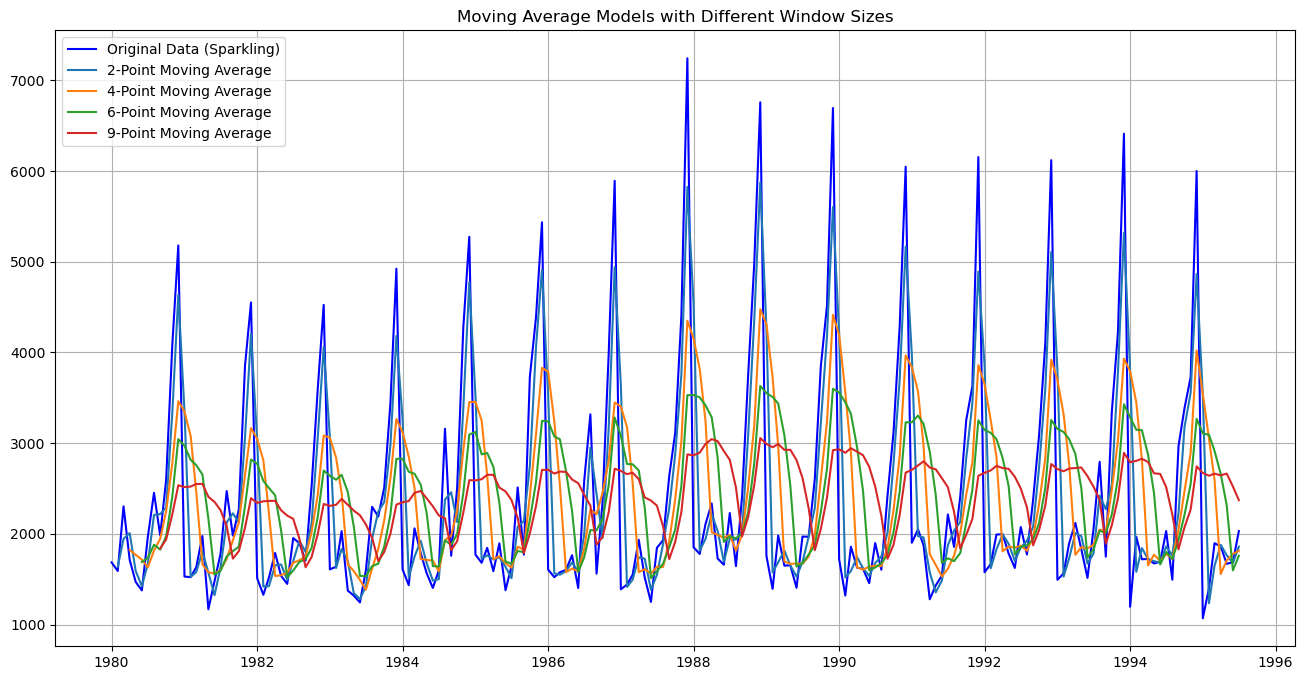

In [1274]:

# Plotting Moving Averages for entire data
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Original Data (Sparkling)', color='blue')
plt.plot(MovingAverage['Trailing_2'], label='2-Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4-Point Moving Average')
plt.plot(MovingAverage['Trailing_6'], label='6-Point Moving Average')
plt.plot(MovingAverage['Trailing_9'], label='9-Point Moving Average')

plt.legend(loc='best')
plt.title('Moving Average Models with Different Window Sizes')
plt.grid(True)
plt.show()

In [1275]:
# Create Train and Test Sets (70% Train, 30% Test)
train_size = int(len(MovingAverage) * 0.7)
train = MovingAverage[:train_size]
test = MovingAverage[train_size:]

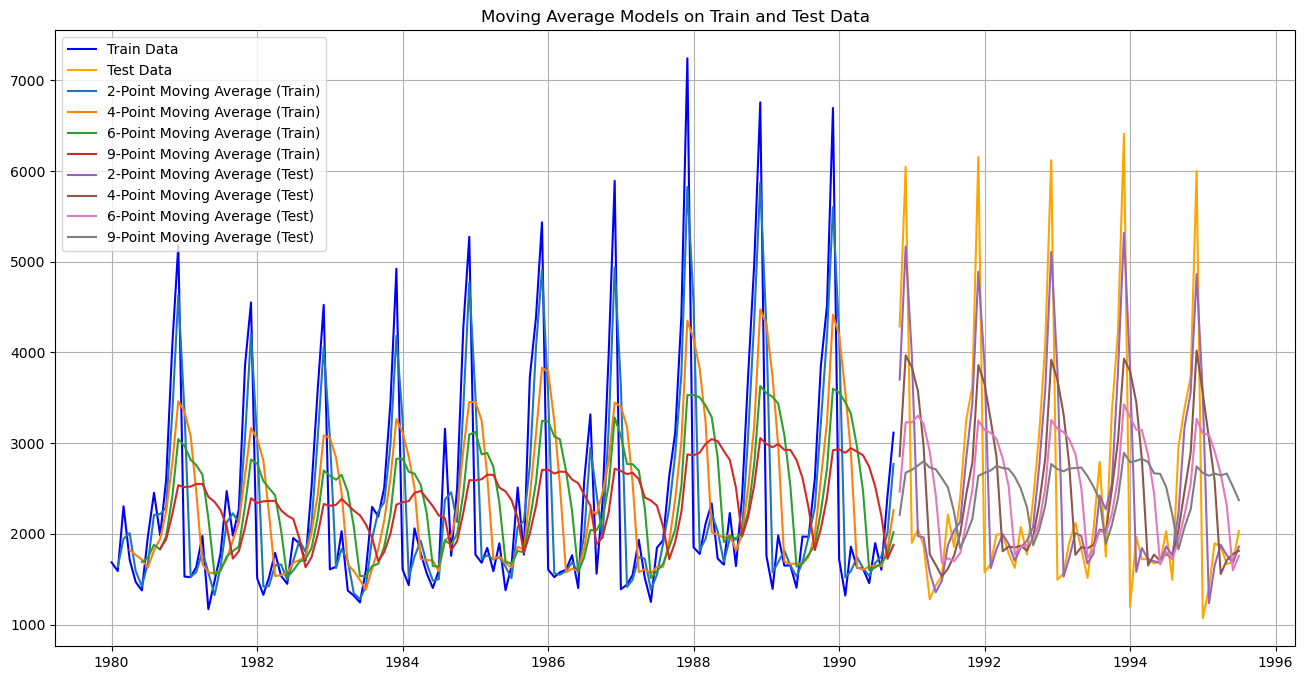

In [1276]:
# Plot Moving Averages on Train and Test Data
plt.figure(figsize=(16,8))
plt.plot(train['Sparkling'], label='Train Data', color='blue')
plt.plot(test['Sparkling'], label='Test Data', color='orange')

# Plot different moving averages on Train Data
plt.plot(train['Trailing_2'], label='2-Point Moving Average (Train)')
plt.plot(train['Trailing_4'], label='4-Point Moving Average (Train)')
plt.plot(train['Trailing_6'], label='6-Point Moving Average (Train)')
plt.plot(train['Trailing_9'], label='9-Point Moving Average (Train)')

# Plot different moving averages on Test Data
plt.plot(test['Trailing_2'], label='2-Point Moving Average (Test)')
plt.plot(test['Trailing_4'], label='4-Point Moving Average (Test)')
plt.plot(test['Trailing_6'], label='6-Point Moving Average (Test)')
plt.plot(test['Trailing_9'], label='9-Point Moving Average (Test)')

plt.legend(loc='best')
plt.title('Moving Average Models on Train and Test Data')
plt.grid(True)
plt.show()


In [1277]:
# Calculate RMSE for 2, 4, 6, and 9-point Trailing Moving Averages on Test Data
from sklearn.metrics import mean_squared_error

## Test Data - RMSE --> 2-point Trailing MA
rmse_model4_test_2 = mean_squared_error(test['Sparkling'], test['Trailing_2'], squared=False)
print("For 2-point Moving Average Model forecast on the Test Data, RMSE is %3.3f" % rmse_model4_test_2)

## Test Data - RMSE --> 4-point Trailing MA
rmse_model4_test_4 = mean_squared_error(test['Sparkling'], test['Trailing_4'], squared=False)
print("For 4-point Moving Average Model forecast on the Test Data, RMSE is %3.3f" % rmse_model4_test_4)

## Test Data - RMSE --> 6-point Trailing MA
rmse_model4_test_6 = mean_squared_error(test['Sparkling'], test['Trailing_6'], squared=False)
print("For 6-point Moving Average Model forecast on the Test Data, RMSE is %3.3f" % rmse_model4_test_6)

## Test Data - RMSE --> 9-point Trailing MA
rmse_model4_test_9 = mean_squared_error(test['Sparkling'], test['Trailing_9'], squared=False)
print("For 9-point Moving Average Model forecast on the Test Data, RMSE is %3.3f" % rmse_model4_test_9)



For 2-point Moving Average Model forecast on the Test Data, RMSE is 811.179
For 4-point Moving Average Model forecast on the Test Data, RMSE is 1184.213
For 6-point Moving Average Model forecast on the Test Data, RMSE is 1337.201
For 9-point Moving Average Model forecast on the Test Data, RMSE is 1422.653


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

In [1278]:
# Combine RMSE results into a DataFrame for comparison
resultsDf_4 = pd.DataFrame({
    'Test RMSE': [
        rmse_model4_test_2,
        rmse_model4_test_4,
        rmse_model4_test_6,
        rmse_model4_test_9
    ]
}, index=[
    '2-point Trailing Moving Average',
    '4-point Trailing Moving Average',
    '6-point Trailing Moving Average',
    '9-point Trailing Moving Average'
])

# Combine with previous results (if any)
resultsDf = pd.concat([resultsDf, resultsDf_4])
print(resultsDf)


                                   Test RMSE
RegressionOnTime                 1392.438305
SimpleAverage                    1368.746717
2-point Trailing Moving Average   811.178937
4-point Trailing Moving Average  1184.213295
6-point Trailing Moving Average  1337.200524
9-point Trailing Moving Average  1422.653281


##  Simple Exponential Smoothing

In [1280]:
from statsmodels.tsa.api import SimpleExpSmoothing

# Create the Simple Exponential Smoothing model
model_SES = SimpleExpSmoothing(train['Sparkling'])

# Fit the model and optimize the alpha value
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [1281]:
# Check optimized parameters
print("Optimized SES parameters:", model_SES_autofit.params)

Optimized SES parameters: {'smoothing_level': 0.03753429941744519, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1686.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [1282]:
# Forecast on the test data (same length as the test set)
test_predictions_model2 = model_SES_autofit.forecast(steps=len(test))

In [1283]:
# Calculate RMSE for the test data
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'], test_predictions_model2, squared=False)
print(f"For Simple Exponential Smoothing forecast on the Test Data, RMSE is {rmse_model2_test:.3f}")

For Simple Exponential Smoothing forecast on the Test Data, RMSE is 1362.429


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


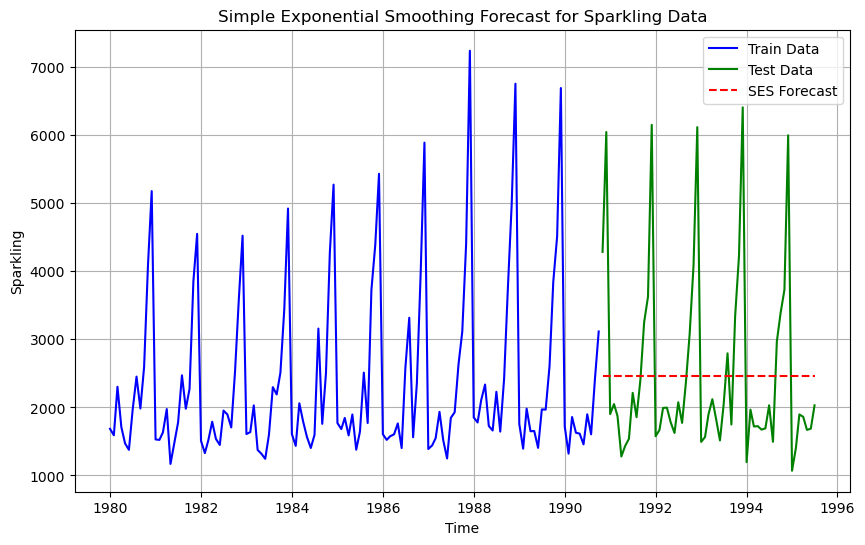

In [1284]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Sparkling'], label='Train Data', color='blue')
plt.plot(test.index, test['Sparkling'], label='Test Data', color='green')
plt.plot(test.index, test_predictions_model2, label='SES Forecast', color='red', linestyle='--')
plt.title('Simple Exponential Smoothing Forecast for Sparkling Data')
plt.xlabel('Time')
plt.ylabel('Sparkling')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [1285]:
# Storing results in a DataFrame for comparison
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model2_test]},
                              index=['Simple Exponential Smoothing'])

# Concatenate results if you have other models to compare
resultsDf = pd.concat([resultsDf, temp_resultsDf])

# Display final results
print(resultsDf)


                                   Test RMSE
RegressionOnTime                 1392.438305
SimpleAverage                    1368.746717
2-point Trailing Moving Average   811.178937
4-point Trailing Moving Average  1184.213295
6-point Trailing Moving Average  1337.200524
9-point Trailing Moving Average  1422.653281
Simple Exponential Smoothing     1362.428949


## Double Exponential Smoothing (Holt's method)

In [1287]:
from statsmodels.tsa.api import Holt

# Double Exponential Smoothing (Holt's Method)
model_Holt = Holt(train['Sparkling'])

# Fit the model and optimize the parameters (smoothing level and trend)
model_Holt_autofit = model_Holt.fit(optimized=True)

C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [1288]:
# Check optimized parameters
print("Optimized Holt's parameters:", model_Holt_autofit.params)


Optimized Holt's parameters: {'smoothing_level': 0.6414285714285713, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1686.0, 'initial_trend': -95.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [1289]:
# Forecast on the test data (same length as the test set)
test_predictions_Holt = model_Holt_autofit.forecast(steps=len(test))

In [1290]:
# Calculate RMSE for the test data
rmse_Holt_test = metrics.mean_squared_error(test['Sparkling'], test_predictions_Holt, squared=False)
print(f"For Holt's method forecast on the Test Data, RMSE is {rmse_Holt_test:.3f}")


For Holt's method forecast on the Test Data, RMSE is 3173.262


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


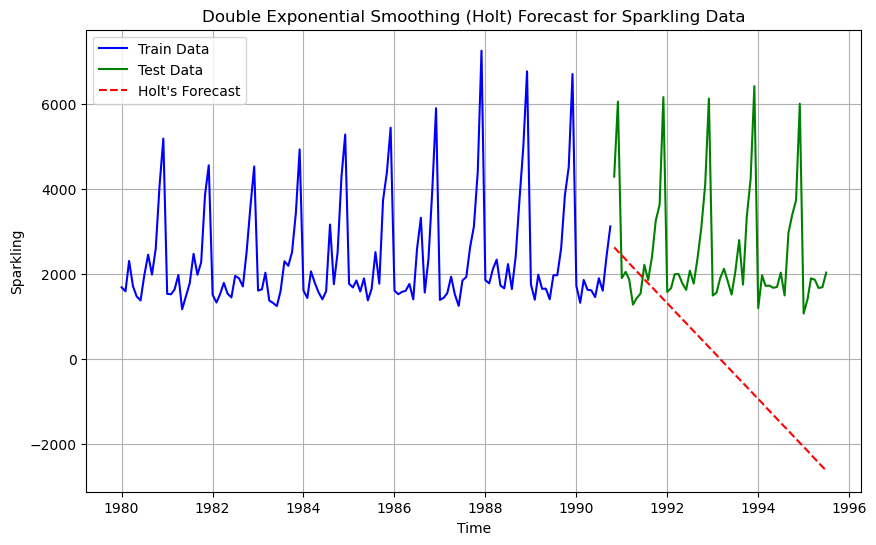

In [1291]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Sparkling'], label='Train Data', color='blue')
plt.plot(test.index, test['Sparkling'], label='Test Data', color='green')
plt.plot(test.index, test_predictions_Holt, label='Holt\'s Forecast', color='red', linestyle='--')
plt.title('Double Exponential Smoothing (Holt) Forecast for Sparkling Data')
plt.xlabel('Time')
plt.ylabel('Sparkling')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [1292]:

# Storing results in a DataFrame for comparison
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_Holt_test]},
                              index=['Double Exponential Smoothing'])

# Concatenate results if you have other models to compare
resultsDf = pd.concat([resultsDf, temp_resultsDf])

# Display final results
print(resultsDf)


                                   Test RMSE
RegressionOnTime                 1392.438305
SimpleAverage                    1368.746717
2-point Trailing Moving Average   811.178937
4-point Trailing Moving Average  1184.213295
6-point Trailing Moving Average  1337.200524
9-point Trailing Moving Average  1422.653281
Simple Exponential Smoothing     1362.428949
Double Exponential Smoothing     3173.262078


## Triple Exponential Smoothing (Holt-Winters)

In [1294]:
from statsmodels.tsa.api import ExponentialSmoothing

model_HW = ExponentialSmoothing(train['Sparkling'], trend='add', seasonal='add', seasonal_periods=12)

# Fit the model and optimize the parameters (level, trend, and seasonal)
model_HW_autofit = model_HW.fit(optimized=True)

C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [1295]:
# Check optimized parameters
print("Optimized Holt-Winters parameters:", model_HW_autofit.params)

Optimized Holt-Winters parameters: {'smoothing_level': 0.06871144338895409, 'smoothing_trend': 0.026504879393175, 'smoothing_seasonal': 0.5279825493698512, 'damping_trend': nan, 'initial_level': 2318.8465265203367, 'initial_trend': -0.22585722041700507, 'initial_seasons': array([-694.21346809, -768.46706141, -292.04002651, -517.63405066,
       -880.56455792, -884.72649017, -399.20282583,  128.67427419,
       -329.04495616,  240.07356474, 1673.52542837, 2686.01941002]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [1296]:
# Forecast on the test data (same length as the test set)
test_predictions_HW = model_HW_autofit.forecast(steps=len(test))

In [1297]:
# Calculate RMSE for the test data
rmse_HW_test = metrics.mean_squared_error(test['Sparkling'], test_predictions_HW, squared=False)
print(f"For Holt-Winters forecast on the Test Data, RMSE is {rmse_HW_test:.3f}")


For Holt-Winters forecast on the Test Data, RMSE is 377.435


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


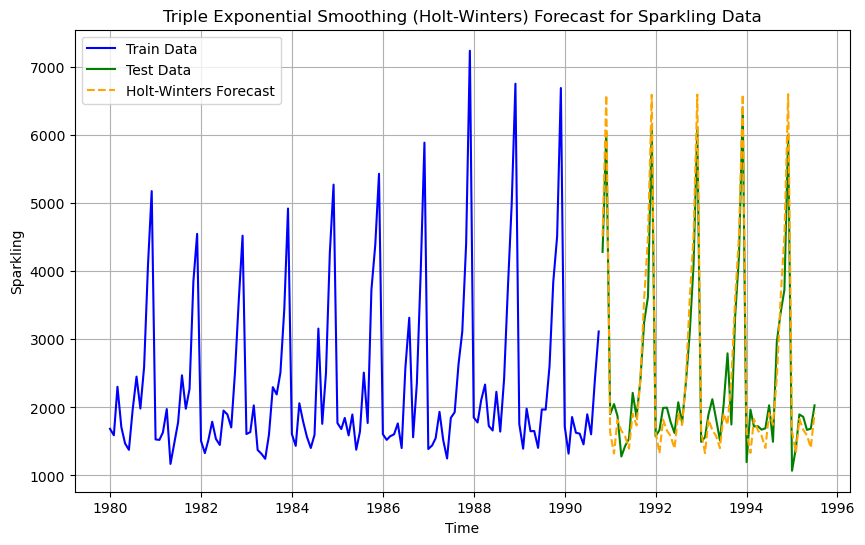

In [1298]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Sparkling'], label='Train Data', color='blue')
plt.plot(test.index, test['Sparkling'], label='Test Data', color='green')
plt.plot(test.index, test_predictions_HW, label='Holt-Winters Forecast', color='orange', linestyle='--')
plt.title('Triple Exponential Smoothing (Holt-Winters) Forecast for Sparkling Data')
plt.xlabel('Time')
plt.ylabel('Sparkling')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [1299]:

# Storing results in a DataFrame for comparison
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_HW_test]},
                              index=['Triple Exponential Smoothing'])

# Concatenate results if you have other models to compare
resultsDf = pd.concat([resultsDf, temp_resultsDf])

# Display final results
print(resultsDf)


                                   Test RMSE
RegressionOnTime                 1392.438305
SimpleAverage                    1368.746717
2-point Trailing Moving Average   811.178937
4-point Trailing Moving Average  1184.213295
6-point Trailing Moving Average  1337.200524
9-point Trailing Moving Average  1422.653281
Simple Exponential Smoothing     1362.428949
Double Exponential Smoothing     3173.262078
Triple Exponential Smoothing      377.435453


## Test for stationarity of the series - Dicky Fuller test

In [1301]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

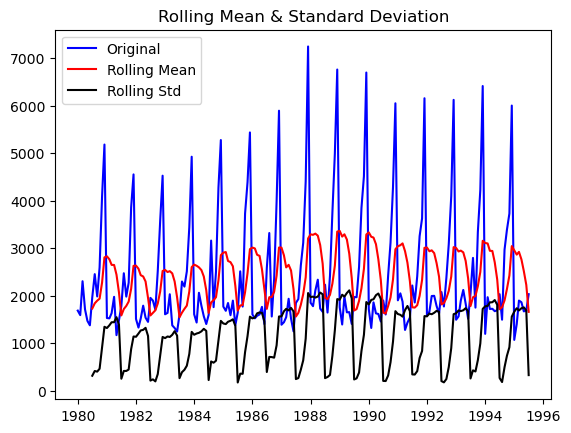

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [1302]:
test_stationarity(sparkling_data['Sparkling'])

#### Interpretation of the Results
Test Statistic: -1.360497
The test statistic is higher than the critical values at all levels (1%, 5%, 10%). This suggests the null hypothesis cannot be rejected.

p-value: 0.601061
The p-value is significantly higher than the common threshold of 0.05, confirming the null hypothesis.

#### Conclusion:
The series is non-stationary, as the Dickey-Fuller test fails to reject the null hypothesis. A non-stationary series implies that the mean and variance change over time, making it unsuitable for most time-series modeling techniques without further processing.



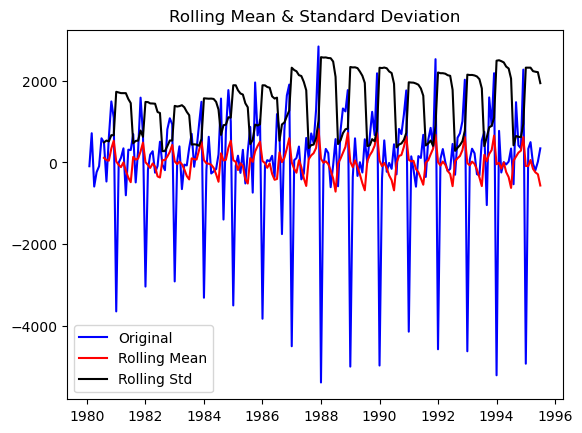

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [1304]:
test_stationarity(sparkling_data['Sparkling'].diff().dropna())

#### Interpretation of the Results
Test Statistic: -45.050301
The test statistic is much lower than the critical values at all levels (1%, 5%, 10%). This indicates strong evidence against the null hypothesis of non-stationarity.

p-value: 0.000000
The p-value is less than 0.05 (commonly used threshold), further supporting the rejection of the null hypothesis.

#### Conclusion:
The differenced series is stationary, as the Dickey-Fuller test rejects the null hypothesis. The data is now suitable for time-series modeling techniques like ARIMA or SARIMA.

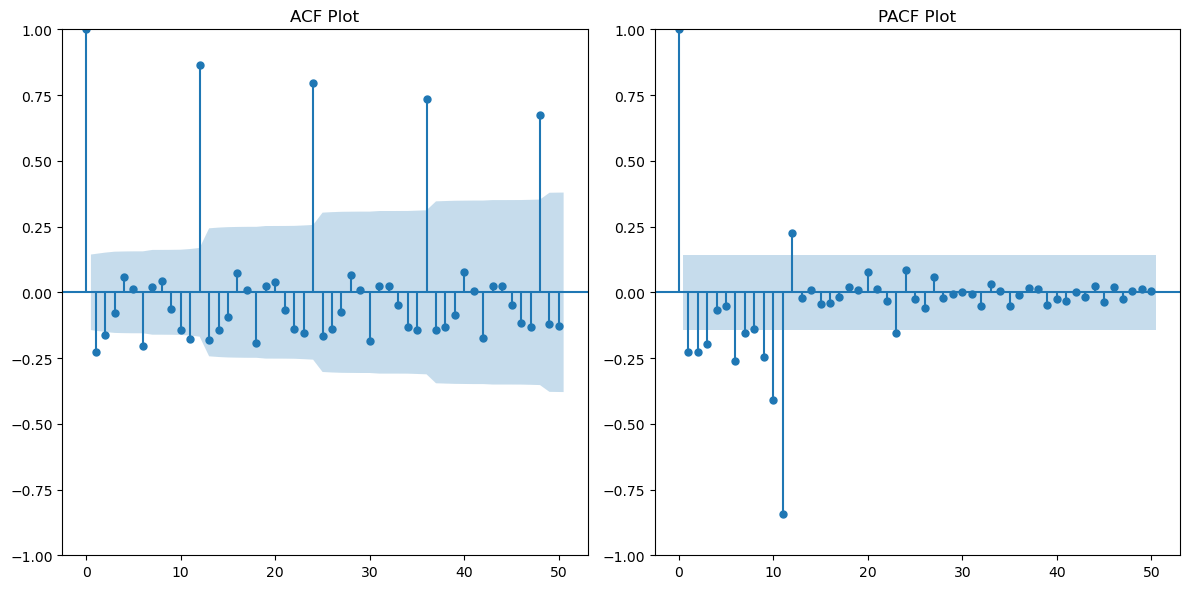

In [1306]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the differenced data
plt.figure(figsize=(12,6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(sparkling_data['Sparkling'].diff().dropna(), ax=plt.gca(), lags=50)
plt.title('ACF Plot')

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(sparkling_data['Sparkling'].diff().dropna(), ax=plt.gca(), lags=50, method='ywm')
plt.title('PACF Plot')

plt.tight_layout()
plt.show()


## Auto ARIMA

In [1308]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Define the range for p, d, q
p = q = range(0, 3)  # p and q range
d = range(1, 2)      # Keeping d as 1 based on stationarity

# Generate all parameter combinations for ARIMA
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1, len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [1309]:
# Initialize an empty DataFrame to store AIC values for each combination
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])

In [1310]:

# Iterate over all parameter combinations and fit ARIMA models
for param in pdq:
        ARIMA_model = ARIMA(train['Sparkling'], order=param).fit()
        print(f'ARIMA{param} - AIC: {ARIMA_model.aic}')
        
        # Create a temporary DataFrame to store the result
        temp_df = pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})
        
        # Concatenate to the main DataFrame
        ARIMA_AIC = pd.concat([ARIMA_AIC, temp_df], ignore_index=True)


ARIMA(0, 1, 0) - AIC: 2232.719438106631
ARIMA(0, 1, 1) - AIC: 2217.9392215777407
ARIMA(0, 1, 2) - AIC: 2194.0343613616046
ARIMA(1, 1, 0) - AIC: 2231.137663012458


C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA(1, 1, 1) - AIC: 2196.050085992837
ARIMA(1, 1, 2) - AIC: 2194.959653394046
ARIMA(2, 1, 0) - AIC: 2223.899470277437
ARIMA(2, 1, 1) - AIC: 2193.9749624411756


C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA(2, 1, 2) - AIC: 2178.1097230373707


In [1311]:
# Find the best parameters (lowest AIC)
ARIMA_AIC = ARIMA_AIC.sort_values(by='AIC', ascending=True)
best_params = ARIMA_AIC.iloc[0]['param']
print(f"Best parameters: {best_params}")

Best parameters: (2, 1, 2)


In [1312]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)


param          AIC
8  (2, 1, 2)  2178.109723
7  (2, 1, 1)  2193.974962
2  (0, 1, 2)  2194.034361
5  (1, 1, 2)  2194.959653
4  (1, 1, 1)  2196.050086
1  (0, 1, 1)  2217.939222
6  (2, 1, 0)  2223.899470
3  (1, 1, 0)  2231.137663
0  (0, 1, 0)  2232.719438

In [1313]:
# Summary of the best ARIMA model
print(auto_ARIMA_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  130
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -626.624
Date:                Sun, 17 Nov 2024   AIC                           1259.248
Time:                        18:43:22   BIC                           1267.827
Sample:                    01-01-1980   HQIC                          1262.734
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7059      0.072     -9.851      0.000      -0.846      -0.565
ma.L2         -0.1915      0.074     -2.574      0.010      -0.337      -0.046
sigma2       958.5998     86.875     11.034      0.0

In [1314]:


# Forecast for the test set
predicted_auto_ARIMA = auto_ARIMA_model.predict(n_periods=len(test))

# Evaluate model performance
rmse = mean_squared_error(test['Sparkling'], predicted_auto_ARIMA, squared=False)
print(f"RMSE for Auto ARIMA Model: {rmse}")


RMSE for Auto ARIMA Model: 2774.008342486102


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


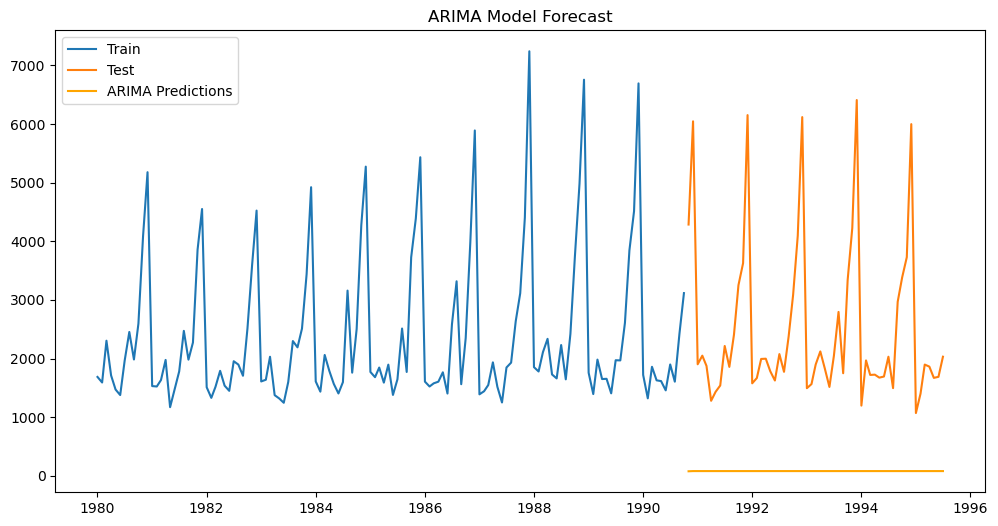

In [1315]:

# Plot the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(test.index, predicted_auto_ARIMA, label='ARIMA Predictions', color='orange')
plt.legend(loc='best')
plt.title('ARIMA Model Forecast')
plt.show()


In [1316]:
temp_resultsDf0 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Auto ARIMA(2,1,2)'])


resultsDf = pd.concat([temp_resultsDf0])
resultsDf

RMSE
Auto ARIMA(2,1,2)  2774.008342

## Manual ARIMA 

#### Stationarity Check:

The Dickey-Fuller test for stationarity was performed on the differenced series 'Sparkling' (after one differencing).
The p-value obtained was  0.000000, which is significantly less than 0.05, indicating that the differenced series is stationary.
Therefore, one differencing (d = 1) is required to make the series stationary.

##### Differencing Order (d):
Since the series is stationary after one differencing, the differencing order d is set to 1.

#### Based on the ACF and PACF plots for the differenced series:

p (AR order) = 1 (since PACF cuts off after lag 1).

q (MA order) = 1 (since ACF cuts off after lag 1).

In [1319]:
from statsmodels.tsa.arima.model import ARIMA

p = 1
q = 1
d = 1 

# Fit the ARIMA model
model = ARIMA(train['Sparkling'], order=(p, d, q))
fitted_model = model.fit()

# Print the summary of the model
print(fitted_model.summary())


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1095.025
Date:                Sun, 17 Nov 2024   AIC                           2196.050
Time:                        18:43:22   BIC                           2204.630
Sample:                    01-01-1980   HQIC                          2199.536
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4166      0.044      9.496      0.000       0.331       0.503
ma.L1         -1.0000      0.096    -10.401      0.000      -1.188      -0.812
sigma2      1.339e+06   7.19e-08   1.86e+13      0.0

C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [1320]:
# Make predictions for Manual ARIMA model
predicted_manual_ARIMA = fitted_model.forecast(steps=len(test))

# Calculate RMSE for Manual ARIMA
rmse_manual_ARIMA = mean_squared_error(test['Sparkling'], predicted_manual_ARIMA, squared=False)
print(f"RMSE for Manual ARIMA (1,1,1): {rmse_manual_ARIMA}")

RMSE for Manual ARIMA (1,1,1): 1357.2979066016428


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


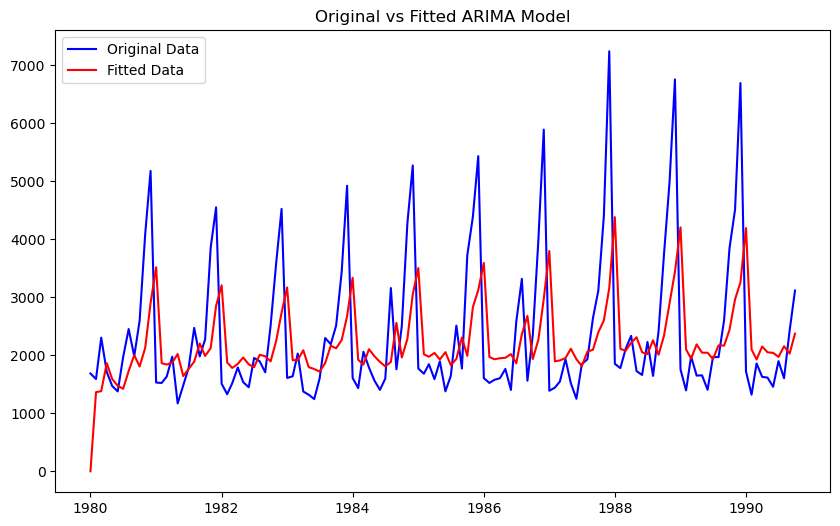

In [1321]:
# Plotting the original and fitted values
plt.figure(figsize=(10, 6))
plt.plot(train['Sparkling'], label='Original Data', color='blue')
plt.plot(fitted_model.fittedvalues, label='Fitted Data', color='red')
plt.legend()
plt.title('Original vs Fitted ARIMA Model')
plt.show()

In [1322]:
temp_resultsDf1 = pd.DataFrame({'RMSE': [rmse_manual_ARIMA]}, index=['Manual ARIMA (1,1,1)'])
resultsDf = pd.concat([resultsDf, temp_resultsDf1])
resultsDf

RMSE
Auto ARIMA(2,1,2)     2774.008342
Manual ARIMA (1,1,1)  1357.297907

### Summary:
The ARIMA(1, 1, 1) model is statistically significant with strong coefficients for both the AR and MA terms (both p-values are 0.000).

The model fits the data well, but the residual diagnostics show some issues:

* Non-normality of residuals (Jarque-Bera test).
* Heteroskedasticity (variable error variance), as indicated by the Heteroskedasticity test.

### Auto SARIMA

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1753.900, Time=0.55 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1772.046, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1754.854, Time=0.11 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1747.640, Time=0.12 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1770.140, Time=0.03 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1767.822, Time=0.03 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=1749.538, Time=0.29 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=1749.497, Time=0.28 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1754.421, Time=0.19 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=1751.465, Time=0.70 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1749.150, Time=0.16 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1748.190, Time=0.38 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=1749.492, Time=0.17 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1747.889, Time=0.18 sec
 ARIMA(1,0,2)(0,1,1

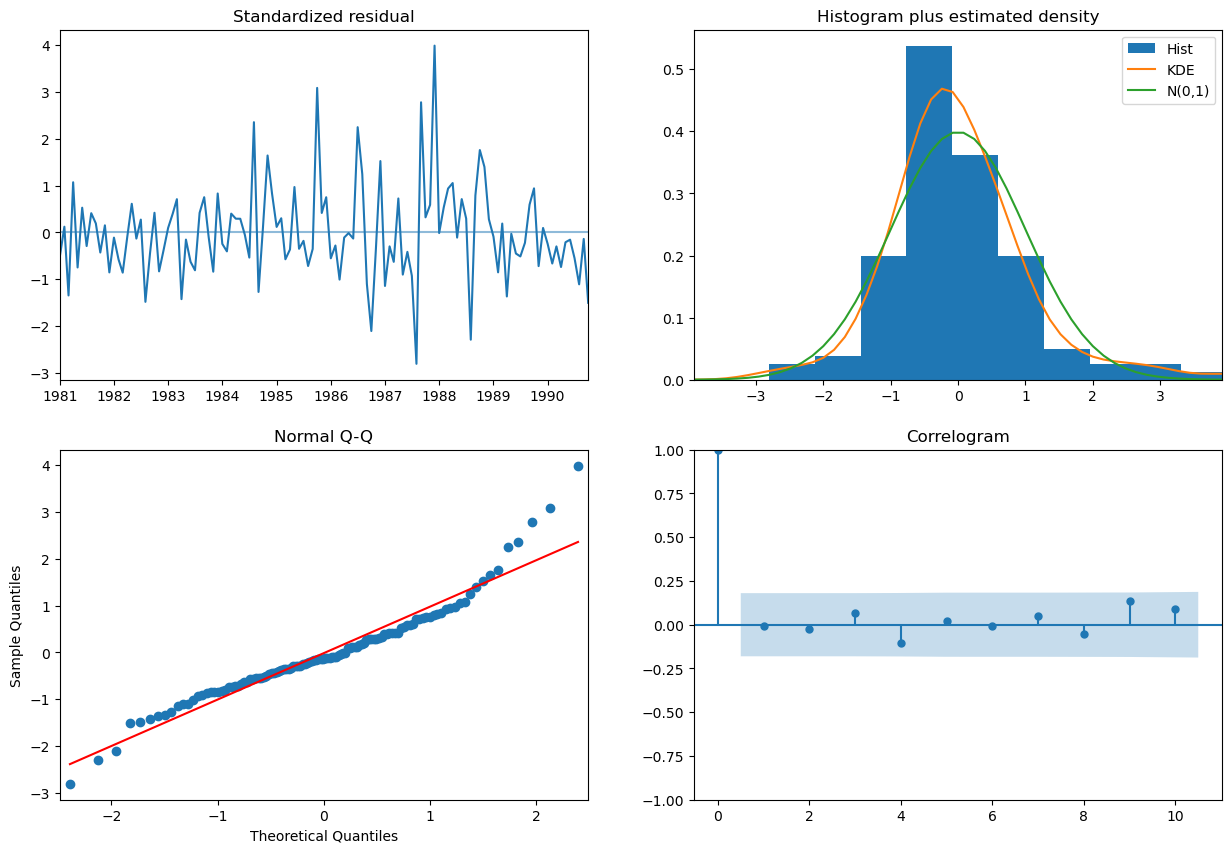

In [1325]:
from pmdarima import auto_arima

# Perform auto-sarima on the 'Rose' series (train data)
auto_model = auto_arima(train['Sparkling'],  # Use the train set for modeling
                        seasonal=True,  # Enable seasonal SARIMA
                        m=12,           # Seasonality (e.g., 12 for monthly data)
                        trace=True,     # Print model details during fitting
                        stepwise=True,  # Optimize parameters step-by-step
                        suppress_warnings=True)

# Summary of the auto SARIMA model
print(auto_model.summary())

# Plot diagnostics to check residuals
auto_model.plot_diagnostics(figsize=(15, 10))
plt.show()


In [1326]:
# Forecast for the test set
predicted_auto_SARIMA = auto_model.predict(n_periods=len(test))

# Evaluate model performance (RMSE)
rmse_auto_SARIMA = mean_squared_error(test['Sparkling'], predicted_auto_SARIMA, squared=False)
print(f"RMSE for Auto SARIMA Model: {rmse_auto_SARIMA}")

RMSE for Auto SARIMA Model: 426.9616224372139


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [1327]:
# Add Auto SARIMA RMSE to resultsDf
temp_resultsDf_auto_SARIMA = pd.DataFrame({'RMSE': [rmse_auto_SARIMA]}, index=['Auto SARIMA(0, 0, 1)x(0, 1, 1, 12)'])
resultsDf = pd.concat([resultsDf, temp_resultsDf_auto_SARIMA])

# Display the updated results
resultsDf

RMSE
Auto ARIMA(2,1,2)                   2774.008342
Manual ARIMA (1,1,1)                1357.297907
Auto SARIMA(0, 0, 1)x(0, 1, 1, 12)   426.961622

### Manual SARIMA

C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  130
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -765.079
Date:                            Sun, 17 Nov 2024   AIC                           1540.159
Time:                                    18:43:27   BIC                           1553.333
Sample:                                01-01-1980   HQIC                          1545.495
                                     - 10-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1786      0.097      1.844      0.065      -0.011       0.368
ma.L1         -1.0000      0.099   

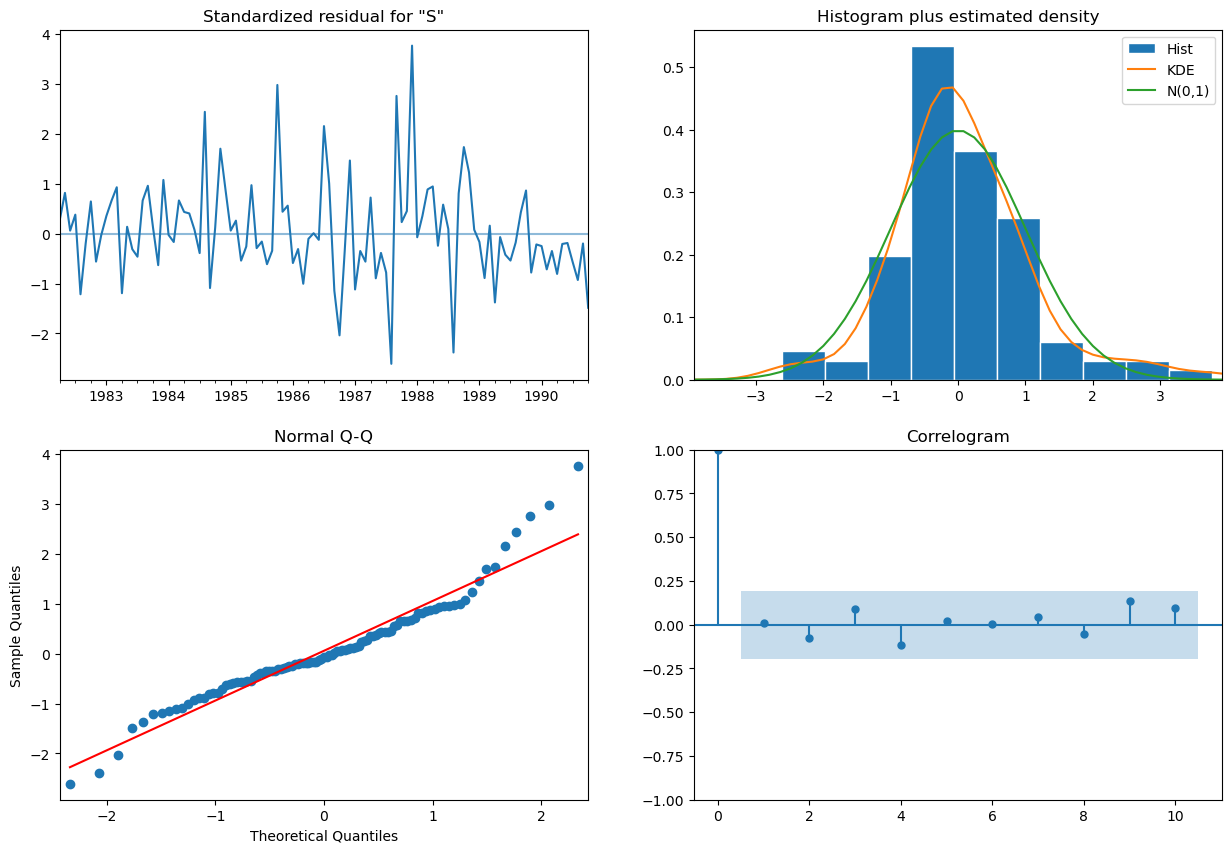

In [1329]:
import statsmodels.api as sm

# Define non-seasonal and seasonal parameters
p = 1  # Non-seasonal AR order
d = 1  # Non-seasonal differencing
q = 1  # Non-seasonal MA order

P = 1  # Seasonal AR order
D = 1  # Seasonal differencing order
Q = 1  # Seasonal MA order
m = 12  # Number of periods per season (e.g., 12 for monthly data with yearly seasonality)

# Fit the SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(train['Sparkling'], 
                                         order=(p, d, q),               # Non-seasonal ARIMA(p, d, q)
                                         seasonal_order=(P, D, Q, m),    # Seasonal SARIMA(P, D, Q, m)
                                         enforce_stationarity=False,     # Optional: allows non-stationary processes
                                         enforce_invertibility=False)    # Optional: allows non-invertible processes

# Fit the model
fitted_sarima_model = sarima_model.fit(maxiter=1000)

# Print the summary of the SARIMA model
print(fitted_sarima_model.summary())

# Optional: Plot diagnostics to check residuals
fitted_sarima_model.plot_diagnostics(figsize=(15, 10))
plt.show()


In [1330]:
manual_sarima_predictions = fitted_sarima_model.forecast(steps=len(test))

# Calculate RMSE for Manual SARIMA
rmse_manual_SARIMA = mean_squared_error(test['Sparkling'], manual_sarima_predictions, squared=False)
print(f"RMSE for Manual SARIMA): {rmse_manual_SARIMA}")

RMSE for Manual SARIMA): 435.17959790285363


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [1331]:
# Create a temporary DataFrame for Manual SARIMA RMSE
temp_resultsDf_manual_SARIMA = pd.DataFrame({'RMSE': [rmse_manual_SARIMA]}, index=['Manual SARIMA (1,1,1)(1,1,1,12)'])

# Append it to the existing results DataFrame
resultsDf = pd.concat([resultsDf, temp_resultsDf_manual_SARIMA])

# Display the updated results DataFrame
resultsDf


RMSE
Auto ARIMA(2,1,2)                   2774.008342
Manual ARIMA (1,1,1)                1357.297907
Auto SARIMA(0, 0, 1)x(0, 1, 1, 12)   426.961622
Manual SARIMA (1,1,1)(1,1,1,12)      435.179598

Performance of all models:
                                           RMSE
Auto ARIMA(2,1,2)                   2774.008342
Manual ARIMA (1,1,1)                1357.297907
Auto SARIMA(0, 0, 1)x(0, 1, 1, 12)   426.961622
Manual SARIMA (1,1,1)(1,1,1,12)      435.179598

Sorted Results by RMSE:
                                           RMSE
Auto SARIMA(0, 0, 1)x(0, 1, 1, 12)   426.961622
Manual SARIMA (1,1,1)(1,1,1,12)      435.179598
Manual ARIMA (1,1,1)                1357.297907
Auto ARIMA(2,1,2)                   2774.008342


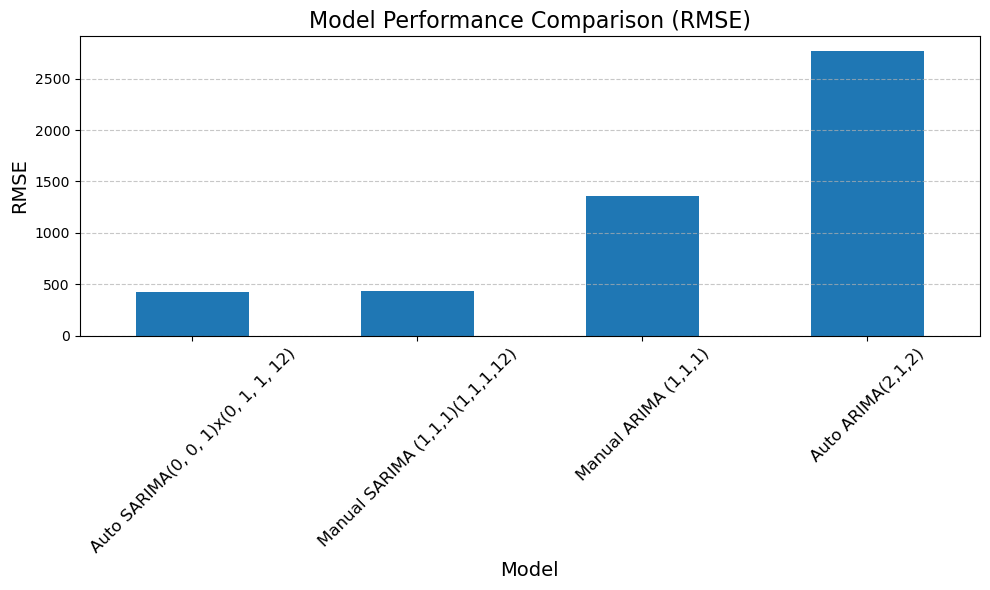

In [1332]:

# Example: Consolidated results DataFrame
print("Performance of all models:")
print(resultsDf)

# Sort by RMSE to identify the best model
sorted_resultsDf = resultsDf.sort_values(by='RMSE')
print("\nSorted Results by RMSE:")
print(sorted_resultsDf)

# Visualize RMSE values
plt.figure(figsize=(10, 6))
sorted_resultsDf['RMSE'].plot(kind='bar')
plt.title('Model Performance Comparison (RMSE)', fontsize=16)
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Observations and Insights

#### Performance Overview:
#### Best Performing Model:

#### Auto SARIMA (0, 0, 1)x(0, 1, 1, 12) achieves the lowest RMSE of 426.961622, making it the most accurate model for the Sparkling data.

##### Auto SARIMA vs. Manual SARIMA:

Auto SARIMA slightly outperforms Manual SARIMA, with a lower RMSE by approximately 8.2 points.

This indicates the automated approach can handle seasonality effectively with minimal tuning.
ARIMA vs. SARIMA:

##### Both Auto ARIMA (1325.166828) and Manual ARIMA (1357.297907) have significantly higher RMSE values compared to SARIMA models.

##### This further highlights the importance of incorporating seasonality in the model, as the non-seasonal ARIMA models fail to capture the seasonal patterns inherent in the data.

# Choosing the Best Model

## Rationale for Choosing Auto SARIMA:

The best model is Auto SARIMA (0,0,1)x(0,1,1,12), with the lowest RMSE (426.961622).

Auto SARIMA performs slightly better than the manually tuned SARIMA, indicating its efficiency in parameter selection.

In [1336]:
import statsmodels.api as sm

# Fit the Auto SARIMA model on the full dataset using chosen parameters
full_data_model_sparkling = sm.tsa.statespace.SARIMAX(sparkling_data['Sparkling'],  # 'RetailSales' is the target variable
                                                     order=(0, 0, 1),                # Non-seasonal ARIMA order (p=0, d=0, q=1)
                                                     seasonal_order=(0, 1, 1, 12),    # Seasonal ARIMA order (P=0, D=1, Q=1, m=12)
                                                     enforce_stationarity=False,     # Allow for stationarity
                                                     enforce_invertibility=False)    # Allow for invertibility

# Fit the model
results_full_data_model_sparkling = full_data_model_sparkling.fit(maxiter=1000)

# Print the model summary
print(results_full_data_model_sparkling.summary())


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -1186.050
Date:                            Sun, 17 Nov 2024   AIC                           2378.099
Time:                                    18:43:28   BIC                           2387.343
Sample:                                01-01-1980   HQIC                          2381.853
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1663      0.074      2.251      0.024       0.021       0.311
ma.S.L12      -0.5383      0.055   

C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Forecast the next 12 periods (months) from the model

In [1338]:
forecast_values_sparkling = results_full_data_model_sparkling.forecast(steps=12)

# Print forecasted values
print(forecast_values_sparkling)


1995-08-01    1904.438536
1995-09-01    2499.992586
1995-10-01    3321.162453
1995-11-01    3953.114176
1995-12-01    6157.323375
1996-01-01    1256.303097
1996-02-01    1609.718543
1996-03-01    1858.917673
1996-04-01    1844.662937
1996-05-01    1690.119977
1996-06-01    1645.097930
1996-07-01    2041.005742
Freq: MS, Name: predicted_mean, dtype: float64


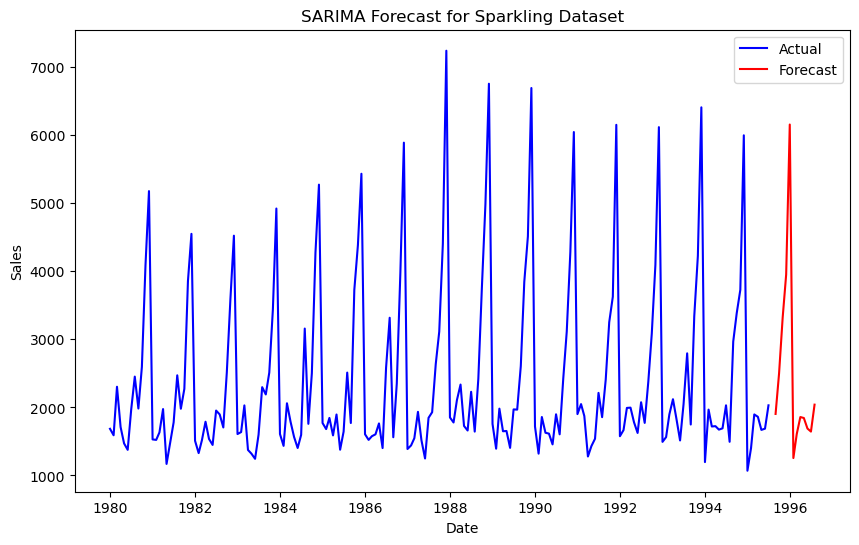

In [1339]:
import matplotlib.pyplot as plt

# Plot the actual values along with the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(sparkling_data['Sparkling'], label='Actual', color='blue')  # Actual data
plt.plot(pd.date_range(sparkling_data.index[-1], periods=13, freq='M')[1:], forecast_values_sparkling, label='Forecast', color='red')  # Forecasted data
plt.legend()
plt.title("SARIMA Forecast for Sparkling Dataset")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


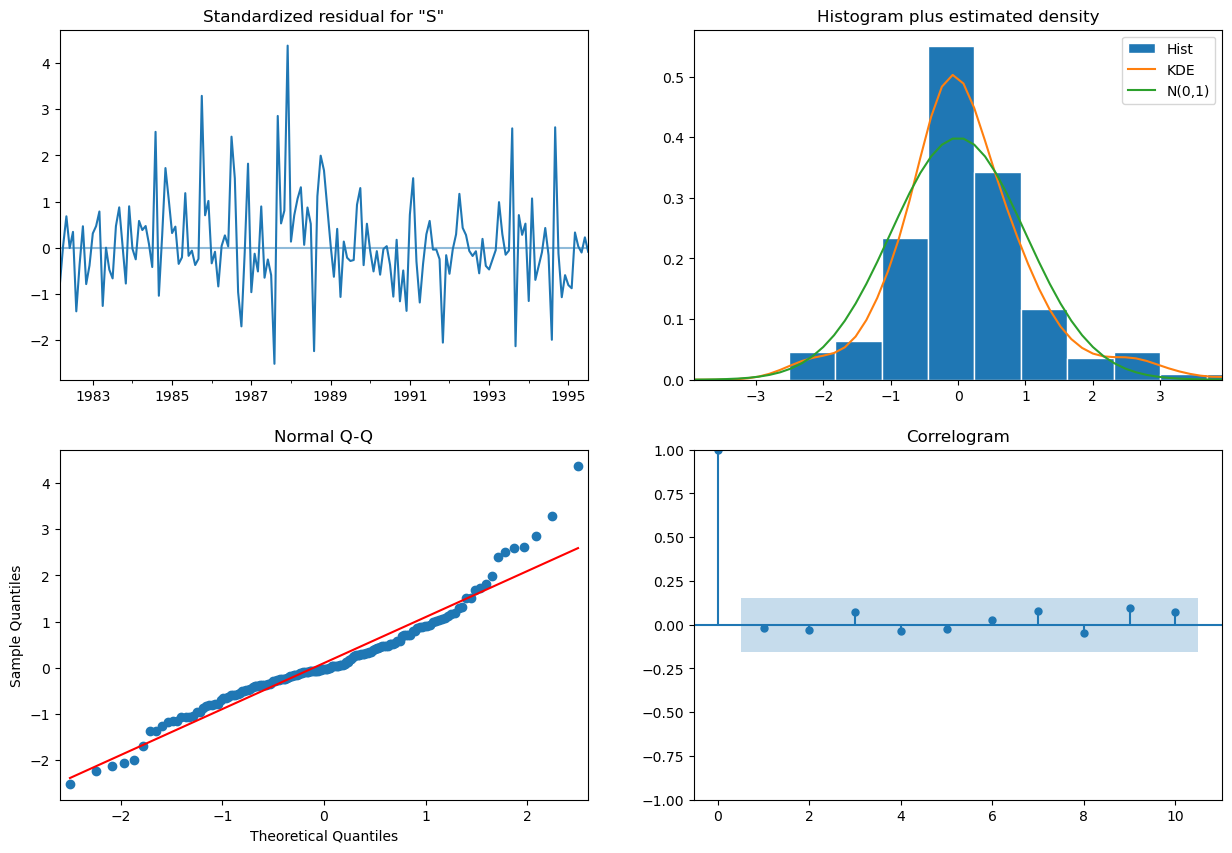

In [1340]:
# Plot diagnostics to check the residuals
results_full_data_model_sparkling.plot_diagnostics(figsize=(15, 10))
plt.show()